In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Avance 1

In [2]:

datos = 'D:/2021/Henry/Módulo 4/PI/data_latinoamerica.csv'
df_data= pd.read_csv(datos,parse_dates=['date']) #Cargar el archivo

In [3]:
df_data.head()

location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
filas, columnas = df_data.shape #Identificar las dimensiones del nuevo DF
print(filas,columnas)


12216057 50


In [5]:
paises_unicos = df_data['country_name'].unique()
print(paises_unicos) #Identificar los nombres de los paises

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


In [6]:
df2= df_data[(df_data.country_name=='Argentina')|(df_data.country_name=='Colombia')|(df_data.country_name=='Mexico')|(df_data.country_name=='Chile')|(df_data.country_name=='Peru')|(df_data.country_name=='Brazil')]
df2 #Mostrar el inicio del nuevo DF diltrado por los paises solicitados

location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina            3.0   
1                  AR 2020-01-02           AR    Argentina           14.0   
2                  AR 2020-01-03           AR    Argentina            3.0   
3                  AR 2020-01-04           AR    Argentina            7.0   
4                  AR 2020-01-05           AR    Argentina            5.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12136772           NaN                   NaN                  NaN   
12136773           NaN                   NaN                  NaN   
12136774           NaN                   NaN                  NaN   
12136775           NaN                   NaN                  NaN   
12136776           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12136772                                    NaN      2860.0  ...   
12136773                                    NaN      2860.0  ...   
12136774                                    NaN      2860.0  ...   
12136775                                    NaN      2860.0  ...   
12136776                                    NaN      2860.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12136772                      NaN               NaN               NaN   
12136773                      NaN               NaN               NaN   
12136774                      NaN               NaN               NaN   
12136775                      NaN               NaN               NaN   
12136776                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12136772              NaN                        NaN   
12136773              NaN                        NaN   
12136774              NaN                        NaN   
1

In [7]:
claves_unicos = df2['location_key'].unique()
print(claves_unicos) #Identificar los nombres de los paises

['AR' 'AR_A' 'AR_A_007' ... 'PE_UCA_0304' 'PE_UCA_0305' 'PE_UCA_0401']


In [8]:
df3= df2[(df2.location_key=='AR')|(df2.location_key=='CO')|(df2.location_key=='MX')|(df2.location_key=='CL')|(df2.location_key=='PE')|(df2.location_key=='BR')]
df3

location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina            3.0   
1                  AR 2020-01-02           AR    Argentina           14.0   
2                  AR 2020-01-03           AR    Argentina            3.0   
3                  AR 2020-01-04           AR    Argentina            7.0   
4                  AR 2020-01-05           AR    Argentina            5.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            NaN   
10253874           PE 2022-09-15           PE         Peru            NaN   
10253875           PE 2022-09-16           PE         Peru            NaN   
10253876           PE 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
0                  76.520                    147.086   
1                  76.520                    147.086   
2                  76.520                    147.086   
3                  76.520                    147.086   
4                  76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

In [9]:
df3 = df3[df3['date'] > '2021-01-01'] #Filtrar por fecha
df3

location_key       date country_code country_name  new_confirmed  \
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
371                AR 2021-01-06           AR    Argentina        14496.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            NaN   
10253874           PE 2022-09-15           PE         Peru            NaN   
10253875           PE 2022-09-16           PE         Peru            NaN   
10253876           PE 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
371              131.0             1718102.0              47293.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
371                                     34162.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
371                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

In [10]:
df3= df3.reset_index(drop=True)
df3

location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-02           AR    Argentina         7767.0   
1              AR 2021-01-03           AR    Argentina         4934.0   
2              AR 2021-01-04           AR    Argentina        13953.0   
3              AR 2021-01-05           AR    Argentina        14085.0   
4              AR 2021-01-06           AR    Argentina        14496.0   
...           ...        ...          ...          ...            ...   
3739           PE 2022-09-13           PE         Peru         1150.0   
3740           PE 2022-09-14           PE         Peru            NaN   
3741           PE 2022-09-15           PE         Peru            NaN   
3742           PE 2022-09-16           PE         Peru            NaN   
3743           PE 2022-09-17           PE         Peru            NaN   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0            166.0             1670634.0              46688.0   
1            157.0             1675568.0              46845.0   
2            157.0             1689521.0              47002.0   
3            160.0             1703606.0              47162.0   
4            131.0             1718102.0              47293.0   
...            ...                   ...                  ...   
3739          22.0             4127612.0             216173.0   
3740           NaN                   NaN                  NaN   
3741           NaN                   NaN                  NaN   
3742           NaN                   NaN                  NaN   
3743           NaN                   NaN                  NaN   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    NaN  29381884.0  ...   
3740                                    NaN  29381884.0  ...   
3741                                    NaN  29381884.0  ...   
3742                                    NaN  29381884.0  ...   
3743                                    NaN  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741           76.51

In [12]:
valores_faltantes_columns = df3.columns[df3.isnull().any()]
for column in valores_faltantes_columns:
    if valores_faltantes_columns is not ["new_covered", "cumulative_recovered", "cumulative_vaccine_doses_administrated"]:
        df3.loc[:, column] = df3.groupby('country_name')[column].transform(lambda x: x.fillna(x.mean()))
df3.loc[:,'new_recovered']=df3['new_recovered'].fillna(0)
df3.loc[:,'cumulative_recovered']=df3['cumulative_recovered'].fillna(0)
df3.loc[:,'cumulative_vaccine_doses_administered']=df3['cumulative_vaccine_doses_administered'].fillna(0)

In [13]:
df3.to_csv('DatosFinalesFiltradoSantiagoLeon.csv', index=False)

In [3]:
df_filtrado_final= pd.read_csv('DatosFinalesFiltradoSantiagoLeon.csv',parse_dates=['date'])

In [15]:
df_filtrado_final

location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-02           AR    Argentina    7767.000000   
1              AR 2021-01-03           AR    Argentina    4934.000000   
2              AR 2021-01-04           AR    Argentina   13953.000000   
3              AR 2021-01-05           AR    Argentina   14085.000000   
4              AR 2021-01-06           AR    Argentina   14496.000000   
...           ...        ...          ...          ...            ...   
3739           PE 2022-09-13           PE         Peru    1150.000000   
3740           PE 2022-09-14           PE         Peru    5032.183871   
3741           PE 2022-09-15           PE         Peru    5032.183871   
3742           PE 2022-09-16           PE         Peru    5032.183871   
3743           PE 2022-09-17           PE         Peru    5032.183871   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    197.233871          2.576906e+06        188954.366129   
3741    197.233871          2.576906e+06        188954.366129   
3742    197.233871          2.576906e+06        188954.366129   
3743    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                              2.033400e+04  44938712.0  ...   
1                              2.052900e+04  44938712.0  ...   
2                              2.516400e+04  44938712.0  ...   
3                              2.985200e+04  44938712.0  ...   
4                              3.416200e+04  44938712.0  ...   
...                                     ...         ...  ...   
3739                           4.087166e+07  29381884.0  ...   
3740                           4.087166e+07  29381884.0  ...   
3741                           4.087166e+07  29381884.0  ...   
3742                           4.087166e+07  29381884.0  ...   
3743                           4.087166e+07  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741           76.51

In [16]:
for i in df_filtrado_final.columns:
    print(i)
    print(df_filtrado_final[i].describe())
    print("-----------------------------------------------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------------------------------
date
count                   3744
mean     2021-11-09 12:00:00
min      2021-01-02 00:00:00
25%      2021-06-06 18:00:00
50%      2021-11-09 12:00:00
75%      2022-04-14 06:00:00
max      2022-09-17 00:00:00
Name: date, dtype: object
-----------------------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      2

In [17]:
def descripcion(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('La mediana es: ', data[i].median())
            print('La varianza es: ',data[i].var())
            print('El rango es: ',data[i].max()-data[i].min())
            print('La moda es: ',data[i].mode())
            print('-------------------------------------------------')
descripcion(df_filtrado_final)

new_confirmed
La mediana es:  5214.0
La varianza es:  586577465.58212
El rango es:  298981.0
La moda es:  0    0.0
Name: new_confirmed, dtype: float64
-------------------------------------------------
new_deceased
La mediana es:  100.5
La varianza es:  257292.4462981465
El rango es:  11447.0
La moda es:  0    0.0
Name: new_deceased, dtype: float64
-------------------------------------------------
cumulative_confirmed
La mediana es:  3632143.5
La varianza es:  63828420109841.22
El rango es:  34567862.0
La moda es:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0


## Avance 2

In [18]:
df_filtrado_final['date'] = pd.to_datetime(df_filtrado_final['date'])
df_filtrado_final = df_filtrado_final.set_index('date', inplace=False)

Text(0.5, 1.0, 'Matriz de correlacion valores absolutos mayores a 0.5')

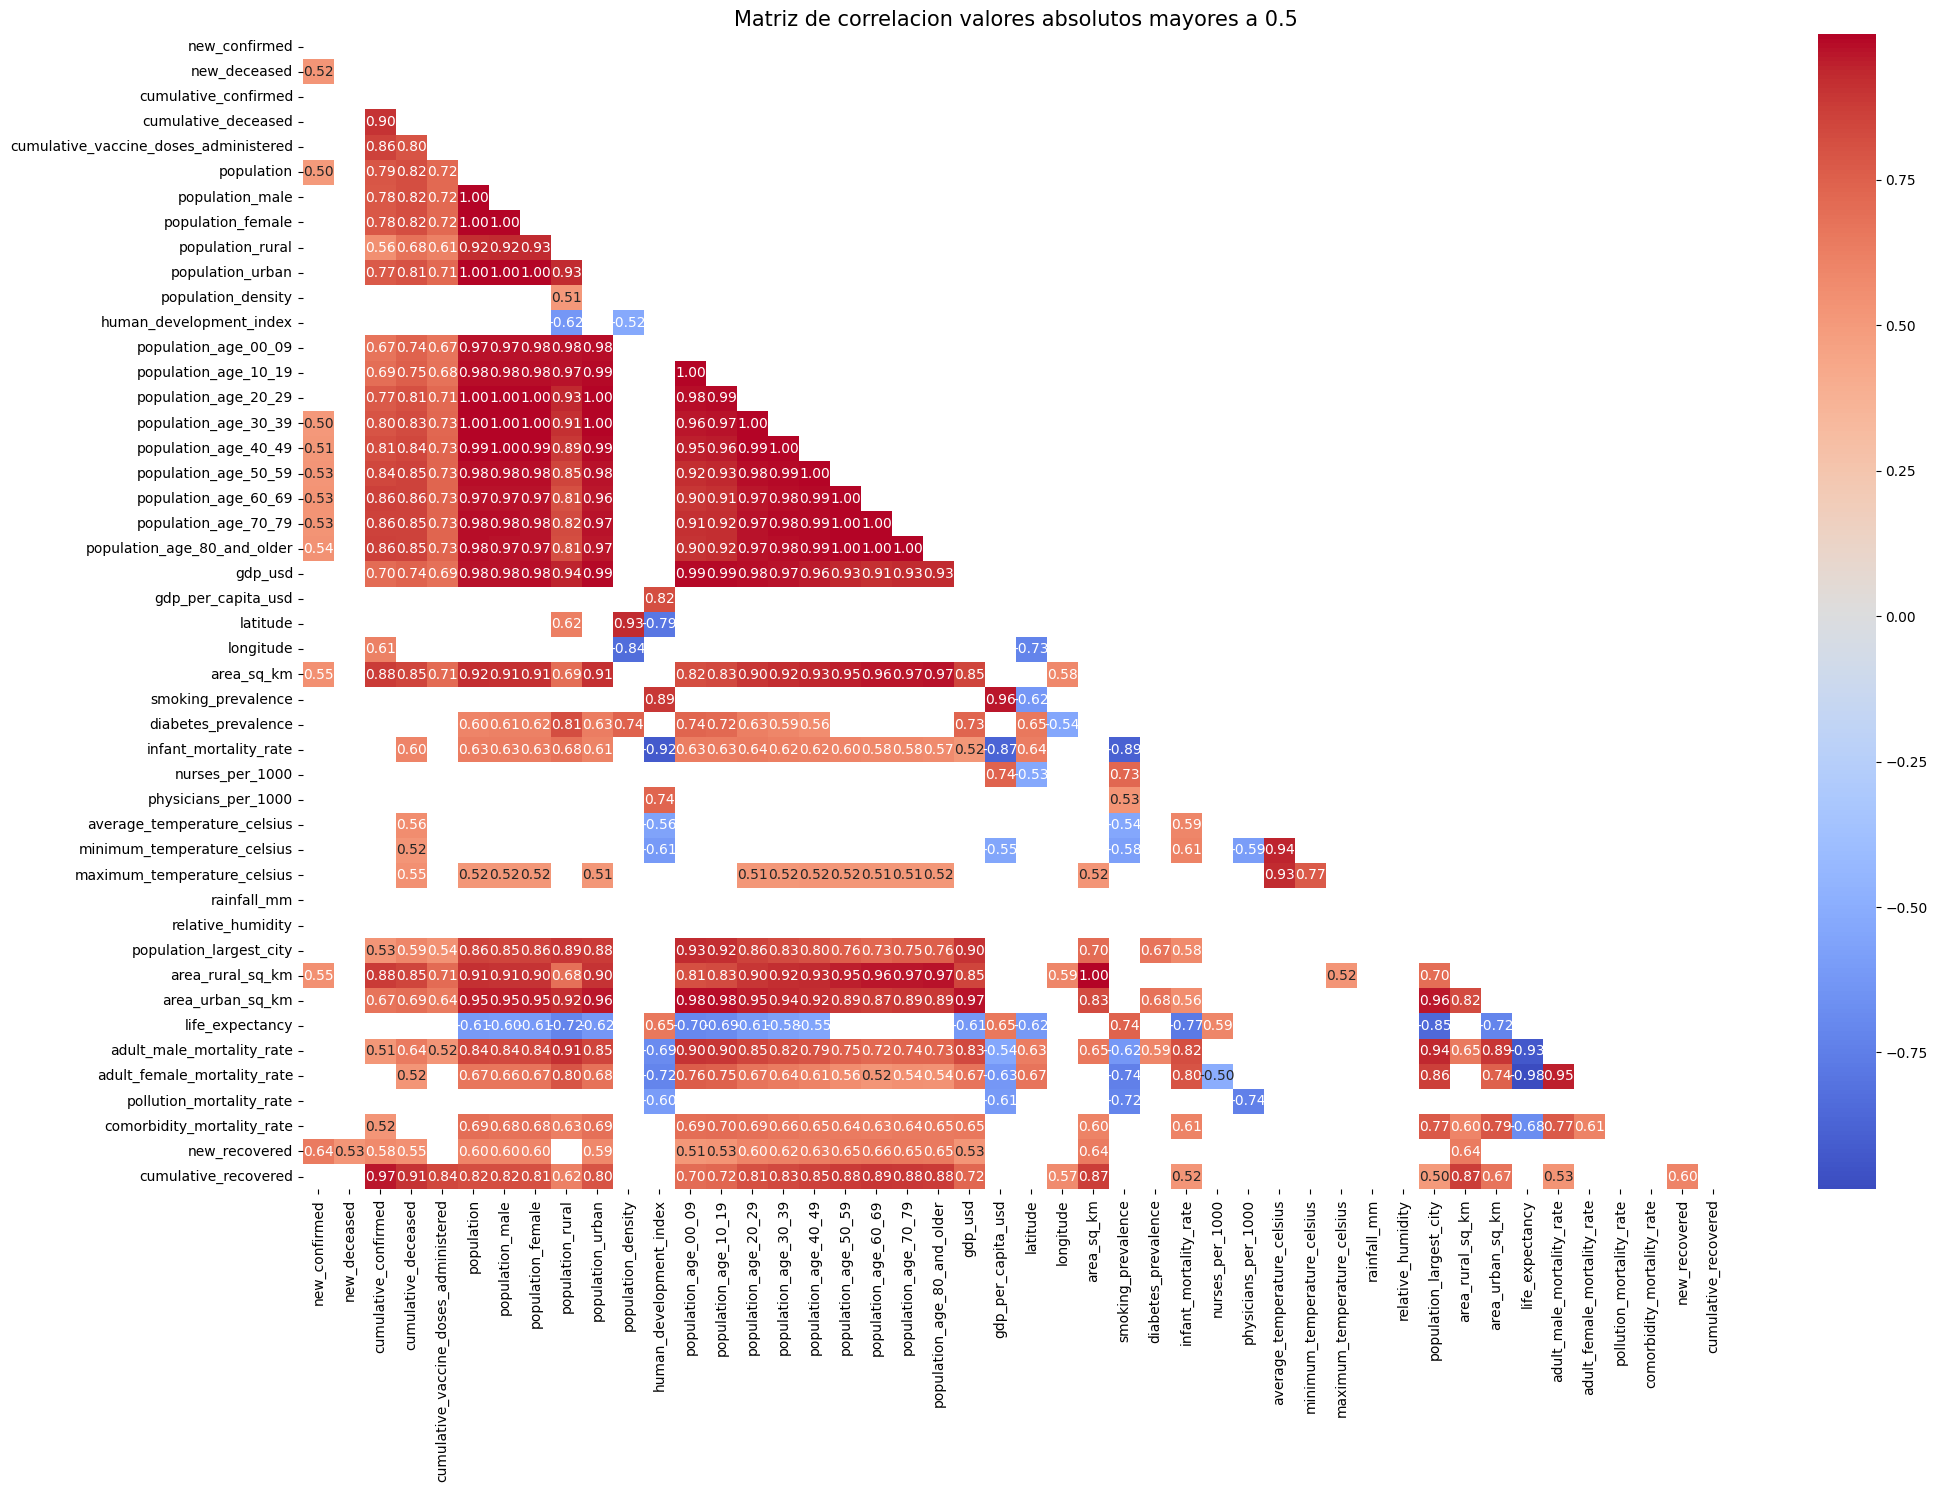

In [19]:
numerico= df_filtrado_final.select_dtypes(include=['int64','float64'])
corr_matrix = df_filtrado_final[numerico.columns].corr()

corr_matrix = corr_matrix[abs(corr_matrix) > abs(0.5)]

plt.figure(figsize=(23,15))
sns.heatmap(corr_matrix, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Matriz de correlacion valores absolutos mayores a 0.5',fontsize=15)

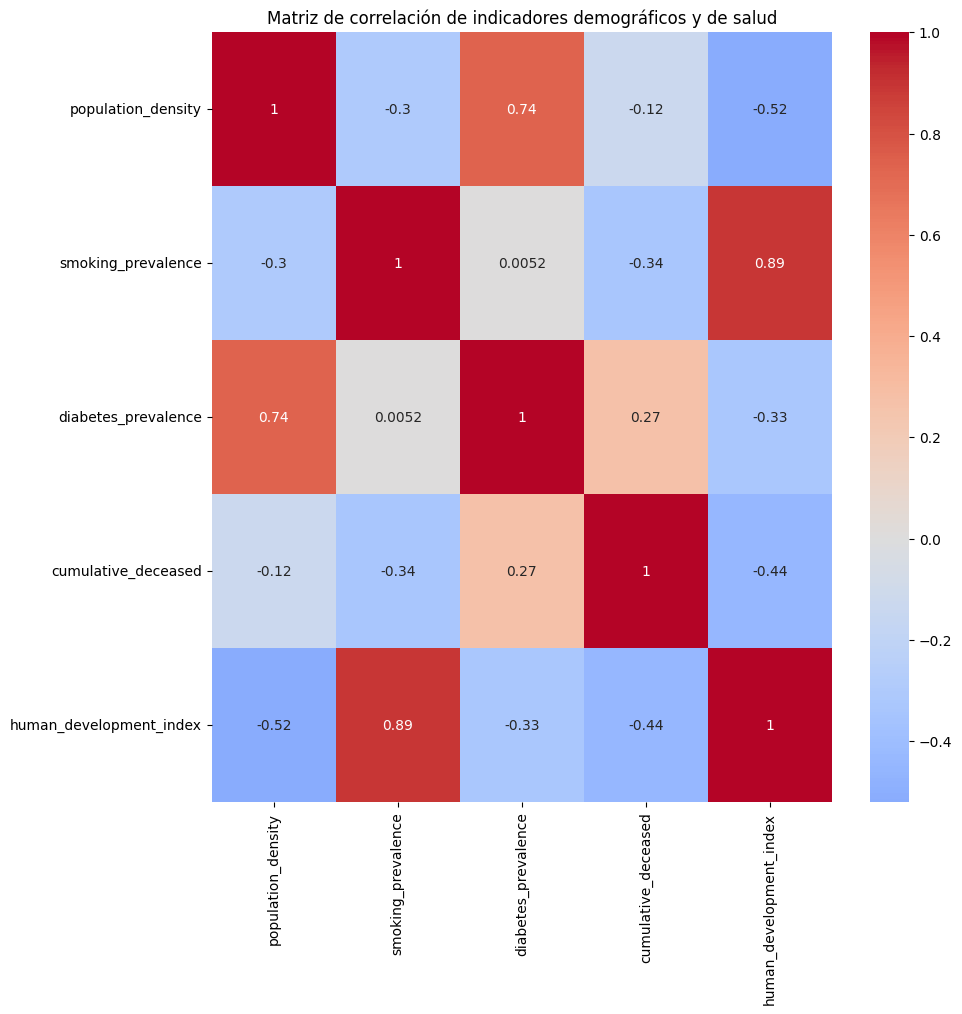

In [20]:
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = df_filtrado_final[columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

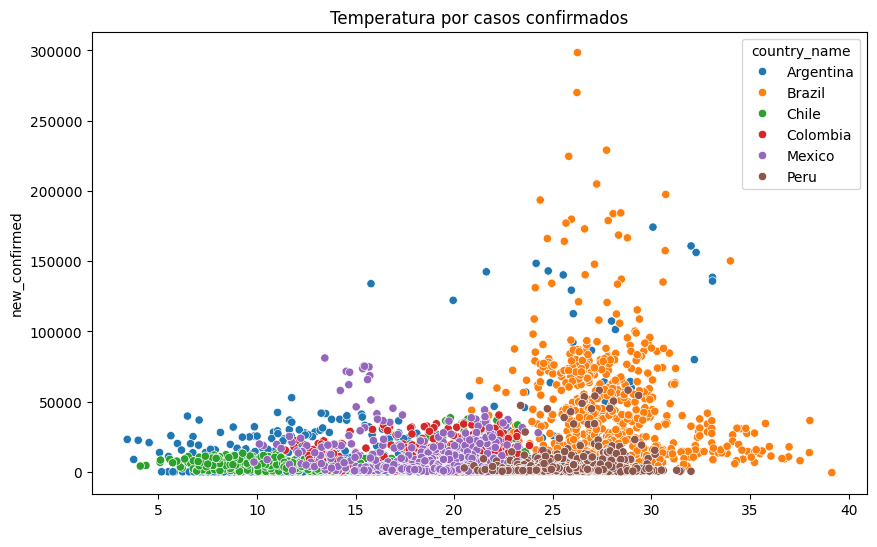

In [21]:
fig, ax=plt.subplots(figsize =(10,6))
sns.scatterplot(x ='average_temperature_celsius', y='new_confirmed', data=df_filtrado_final, hue='country_name')
plt.title('Temperatura por casos confirmados')
plt.show()

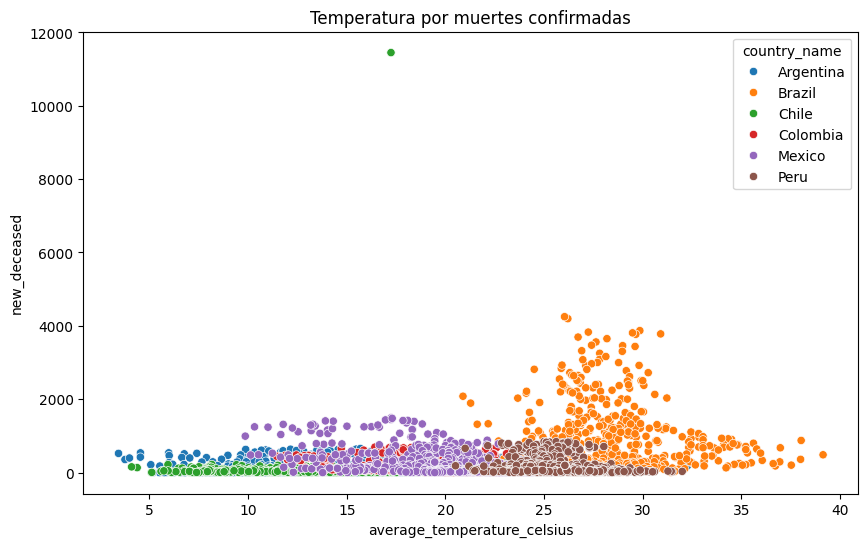

In [22]:
fig, ax=plt.subplots(figsize =(10,6))
sns.scatterplot(x ='average_temperature_celsius', y='new_deceased', data=df_filtrado_final, hue='country_name')
plt.title('Temperatura por muertes confirmadas')
plt.show()

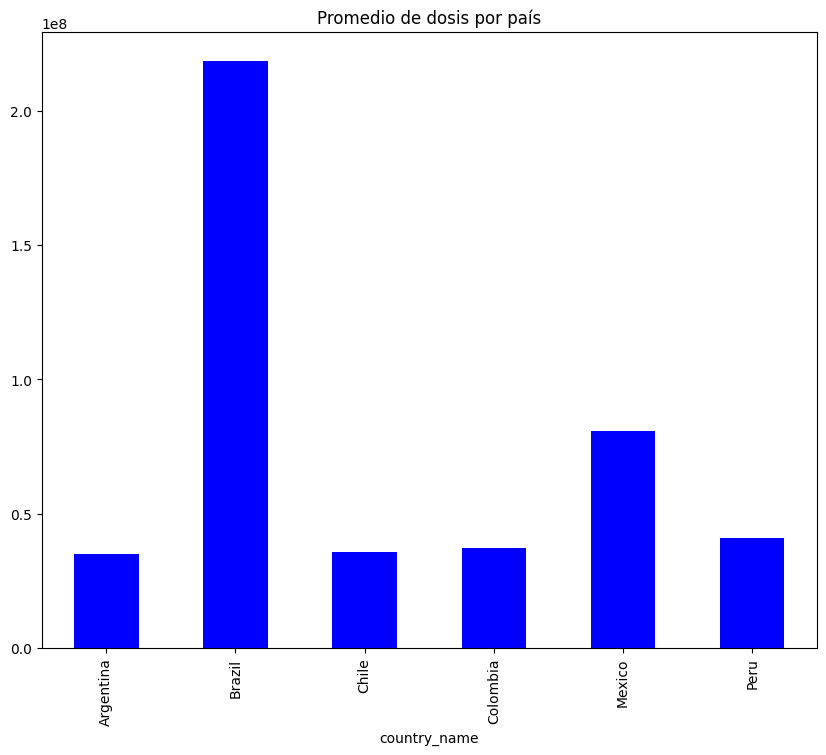

In [23]:
dosis_prm=df_filtrado_final.groupby('country_name')['cumulative_vaccine_doses_administered'].mean()
plt.figure(figsize=(10,8))
dosis_prm.plot(kind='bar', color = 'blue')
plt.title("Promedio de dosis por país")
plt.show()


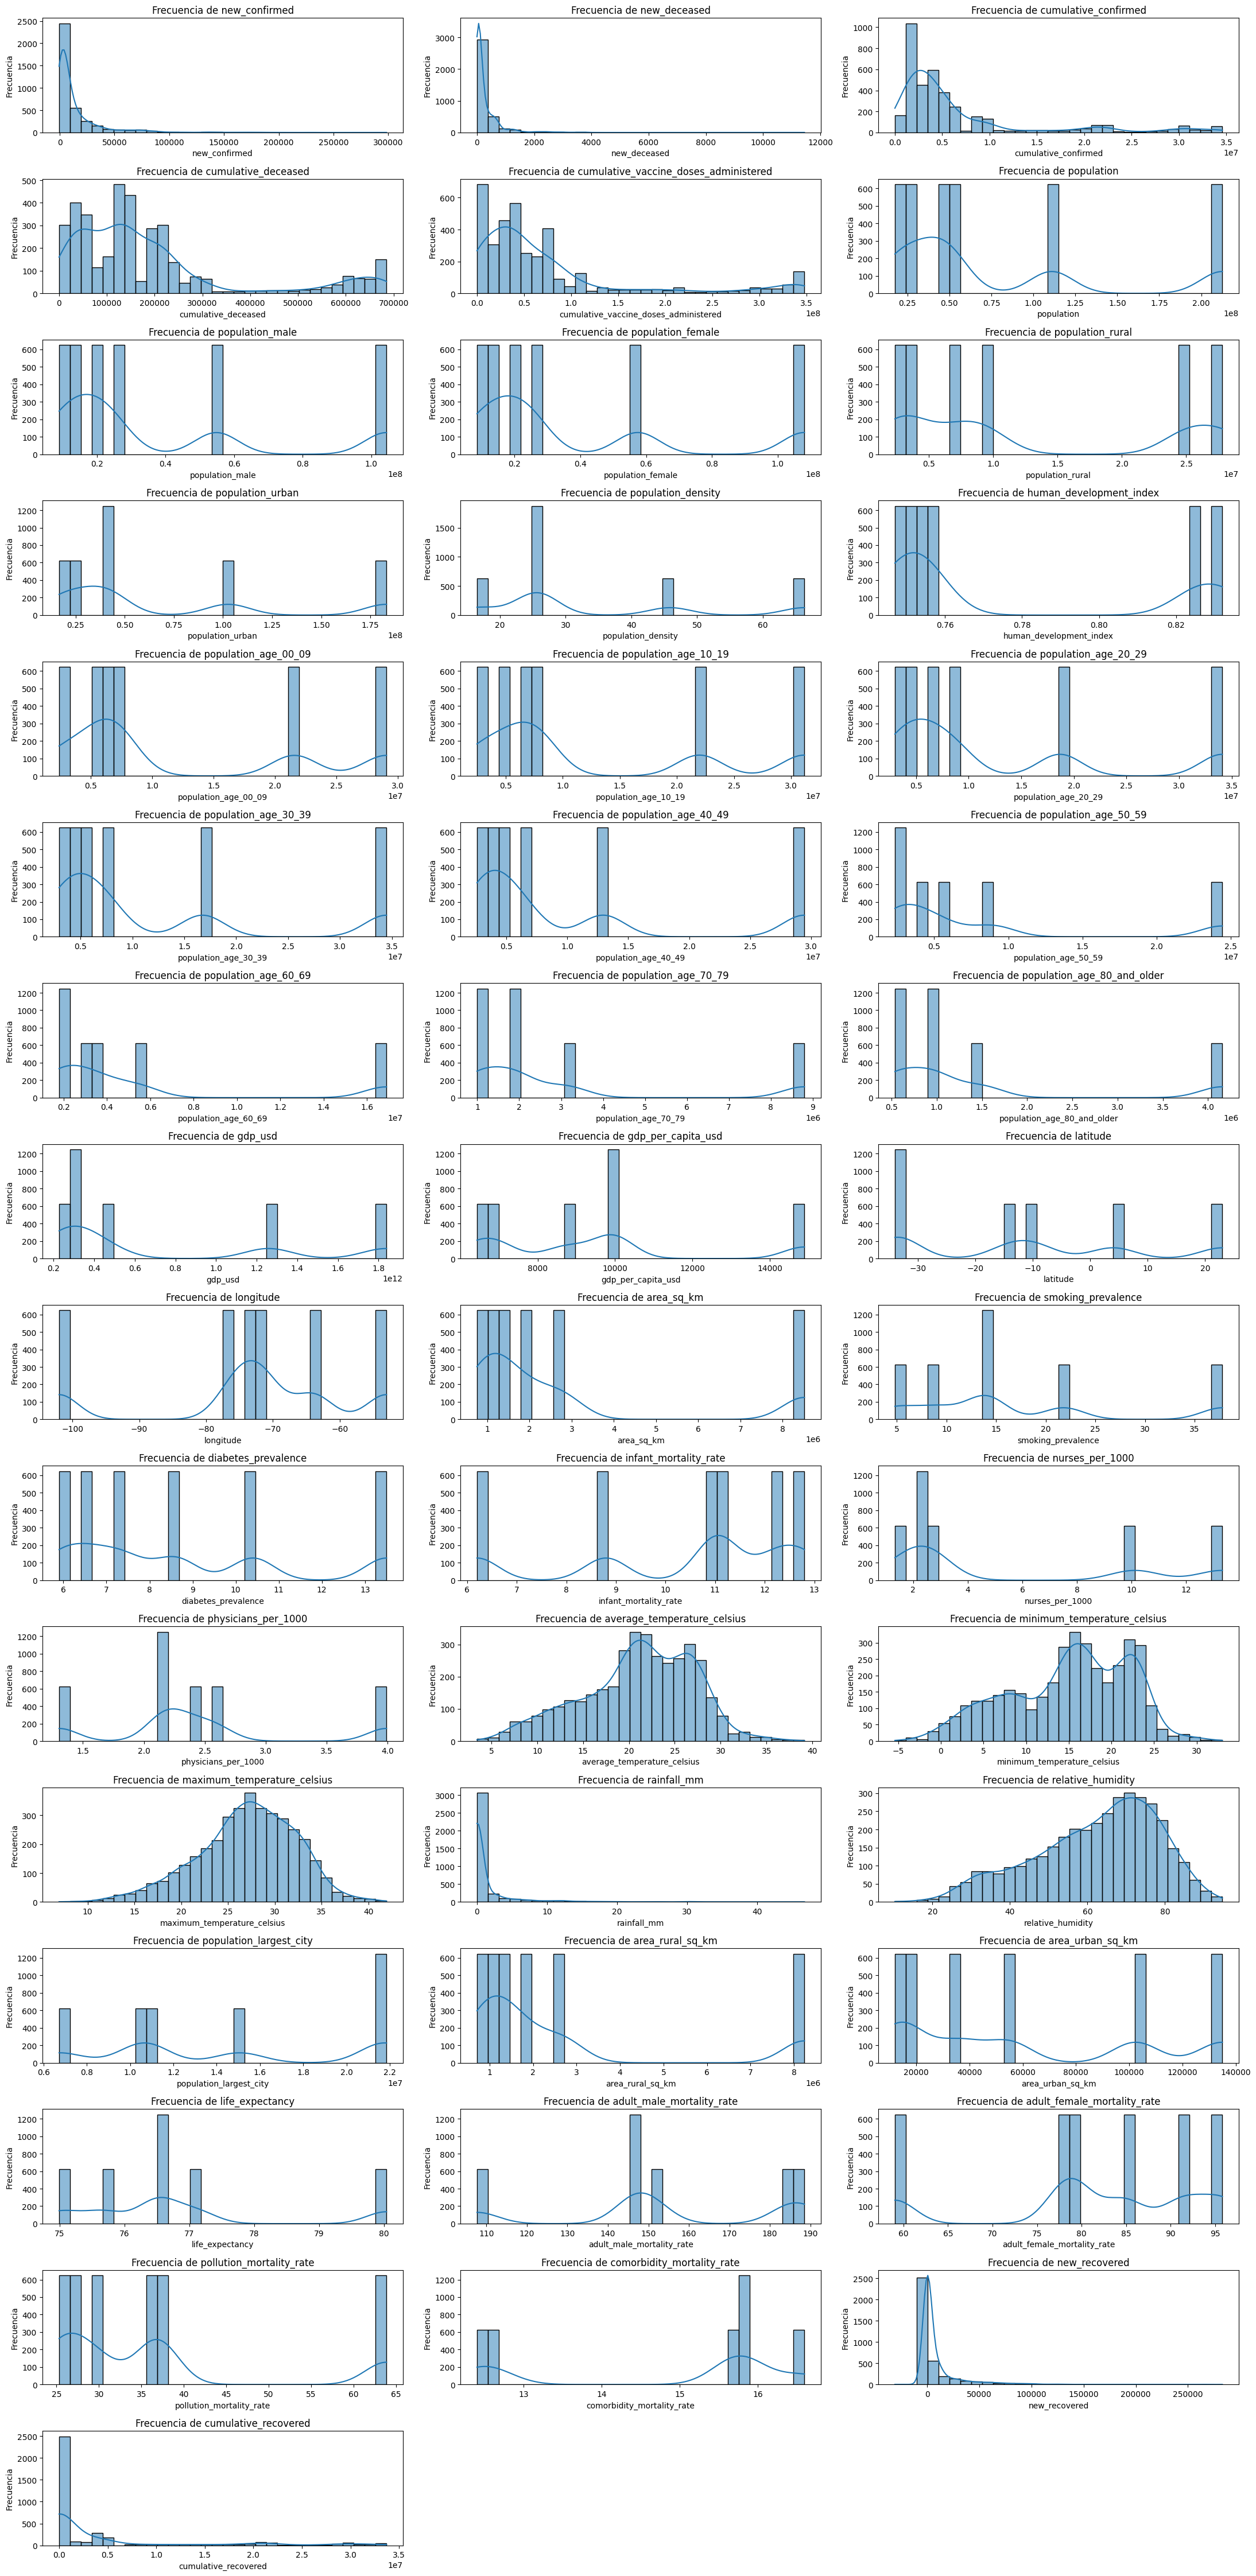

In [24]:
variables_cambios=numerico.columns[numerico.nunique() > 1]
plt.figure(figsize =(22,45))

for i, column in enumerate(variables_cambios, 1):
    plt.subplot(len(variables_cambios) // 3+1,3,i)
    sns.histplot(df_filtrado_final[column], bins=30, kde=True)
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

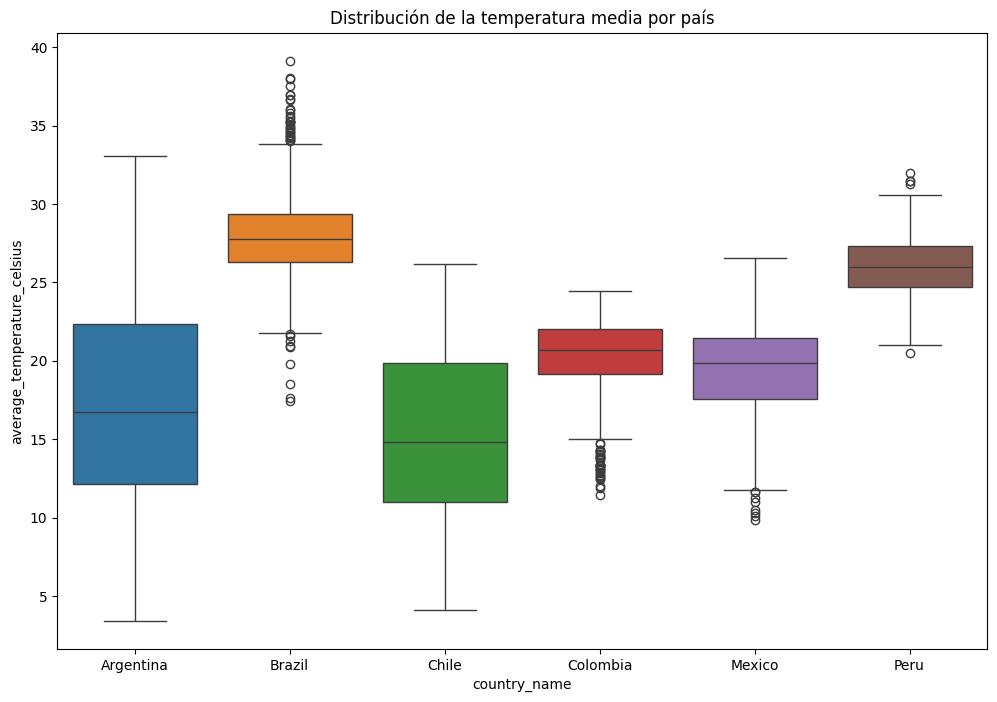

In [4]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_filtrado_final, x='country_name',y='average_temperature_celsius', hue='country_name')
plt.title('Distribución de la temperatura media por país')
plt.show()

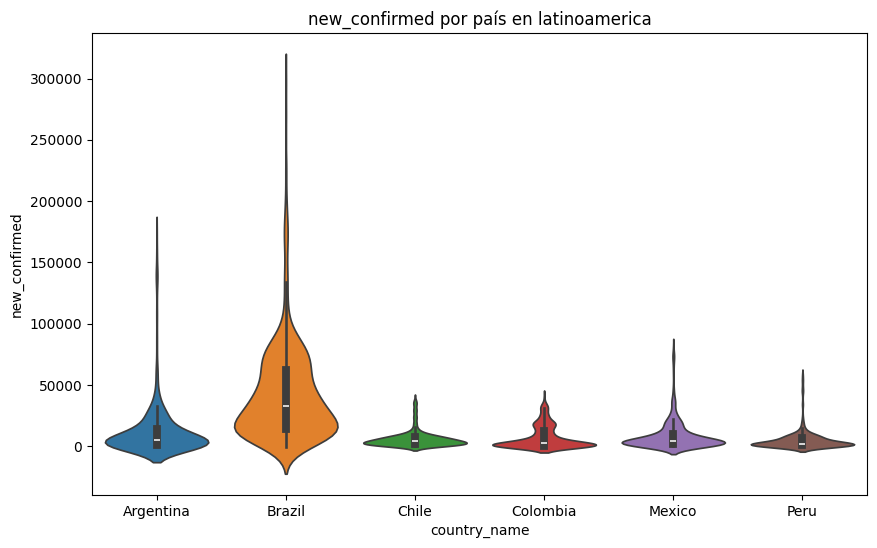

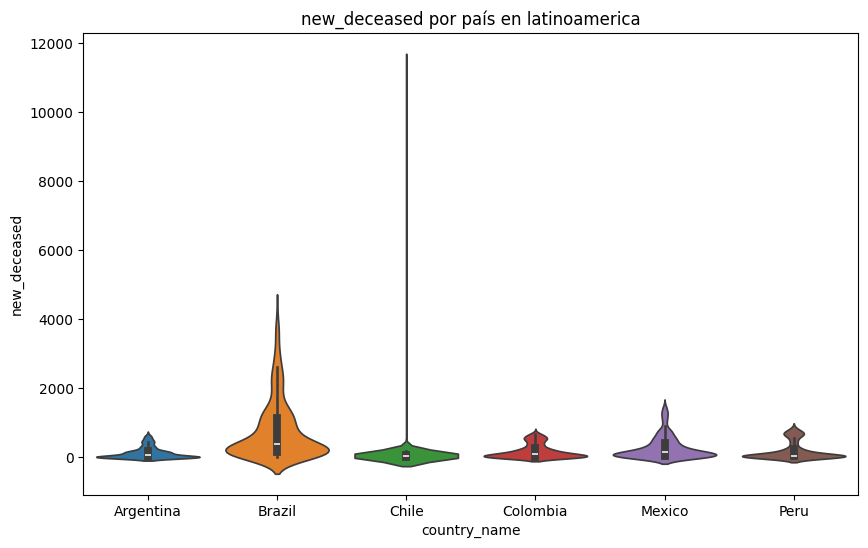

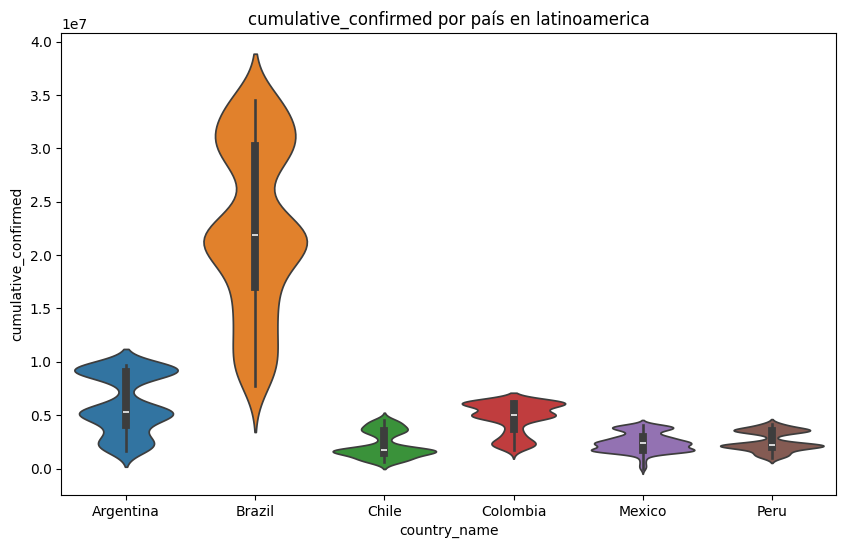

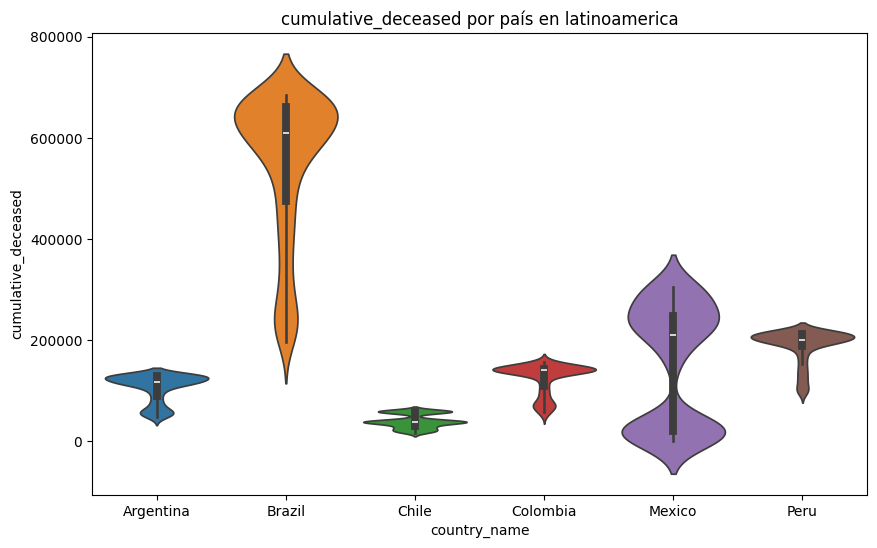

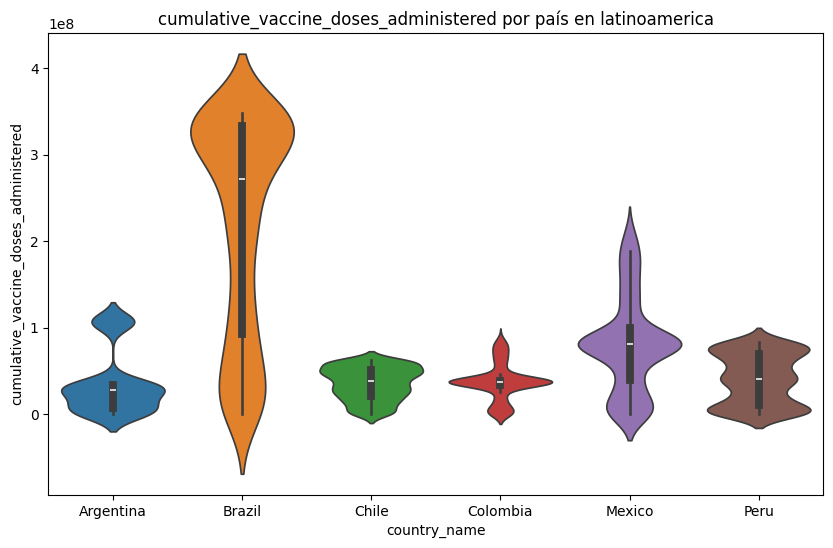

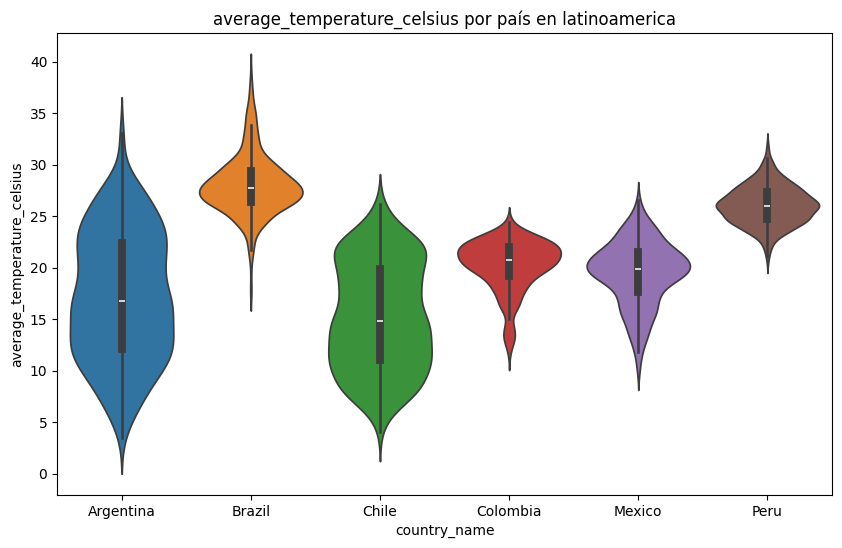

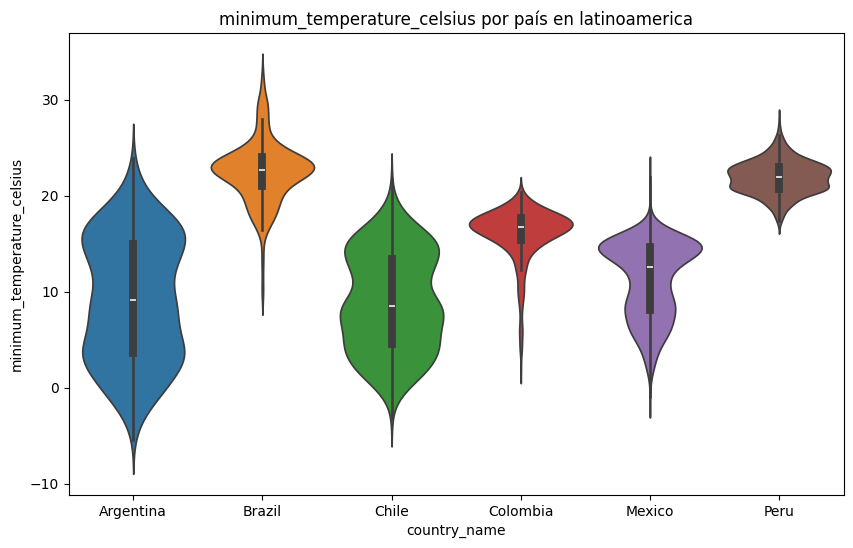

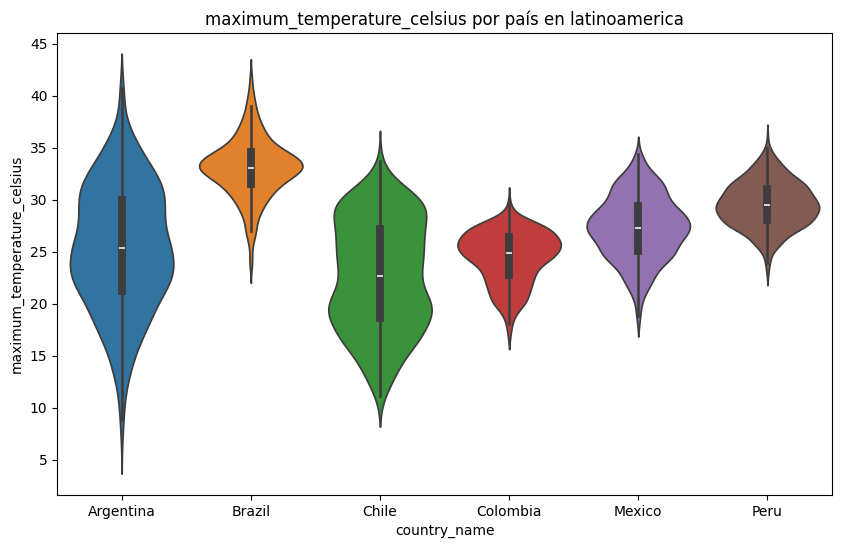

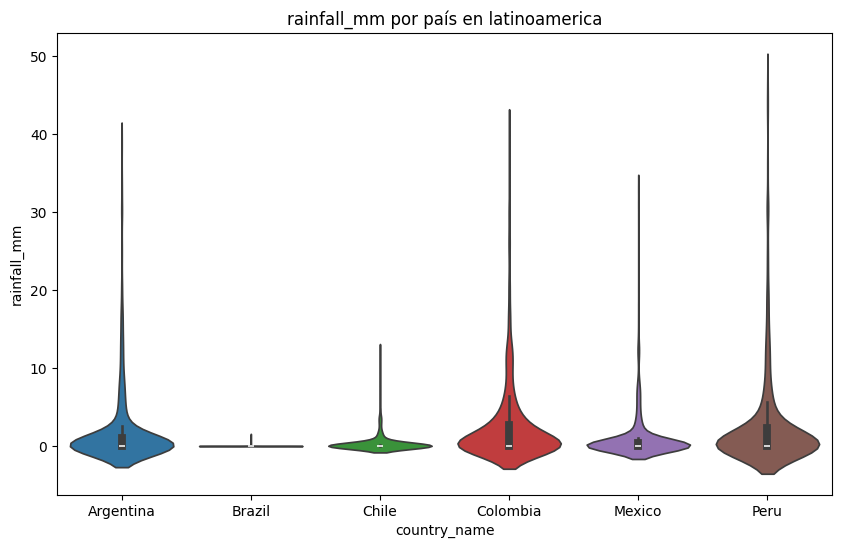

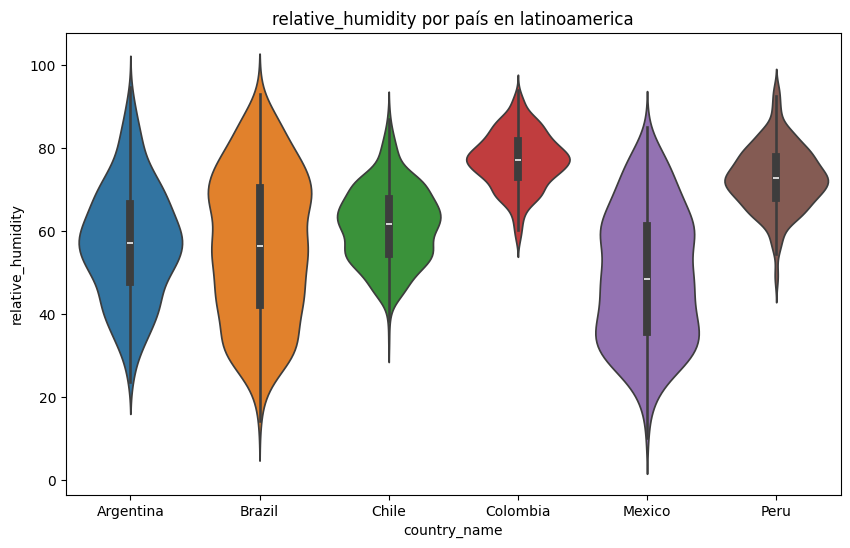

In [26]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
mas_6=[]
for i in df_filtrado_final.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if df_filtrado_final[i].nunique()>6:
            mas_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
mas_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=df_filtrado_final[mas_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name','cumulative_recovered','new_recovered']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

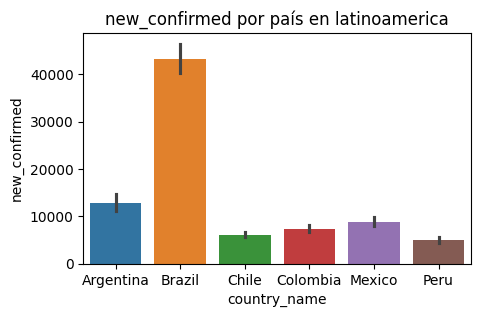

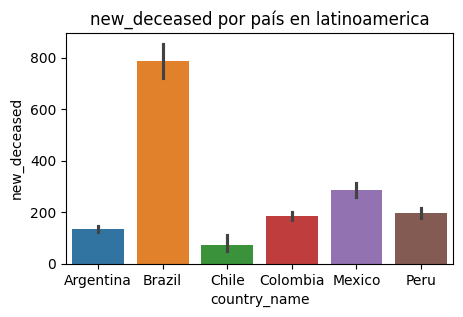

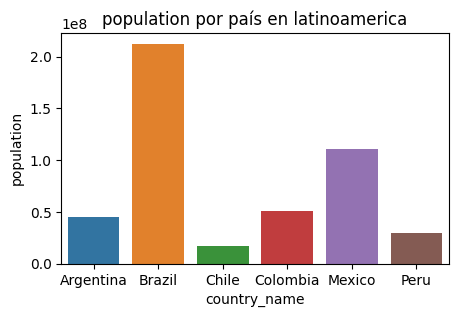

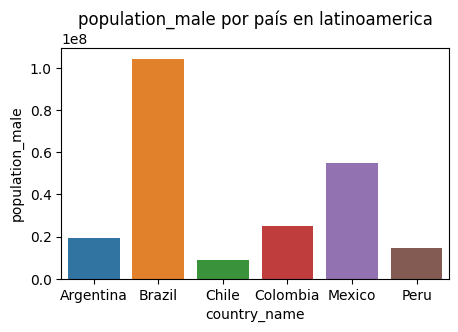

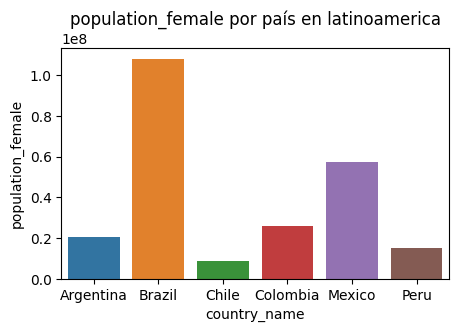

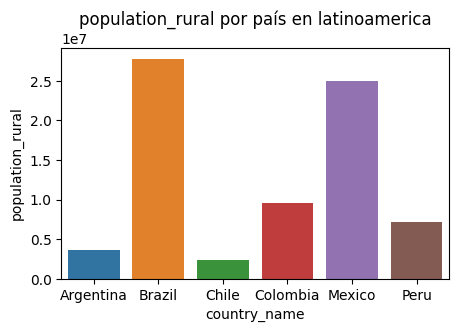

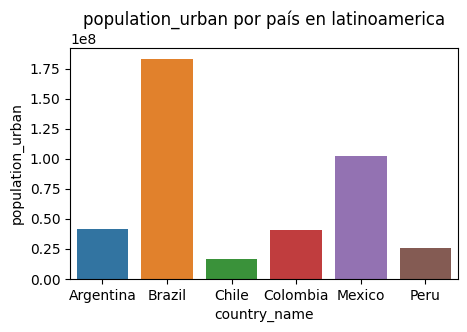

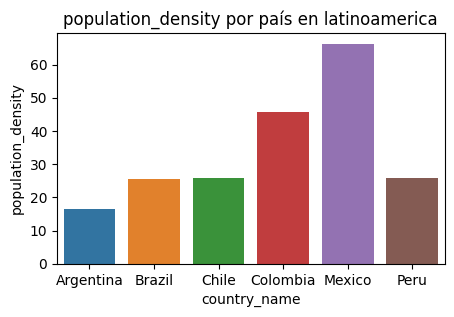

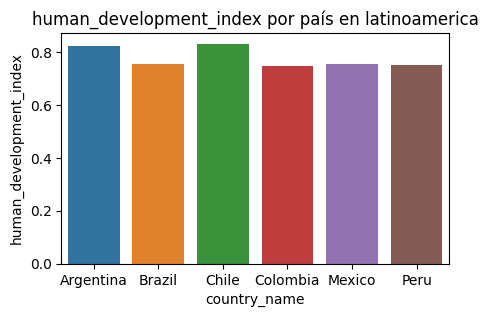

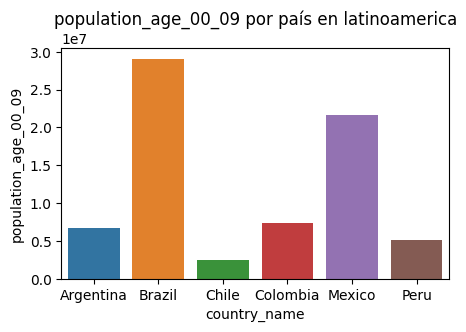

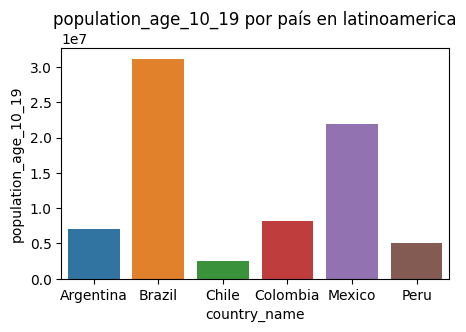

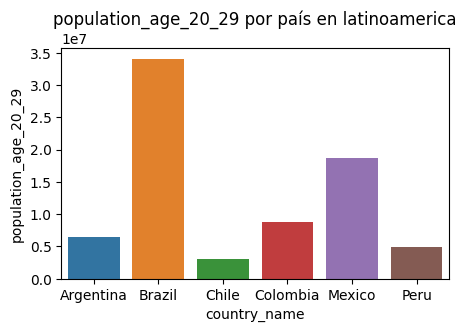

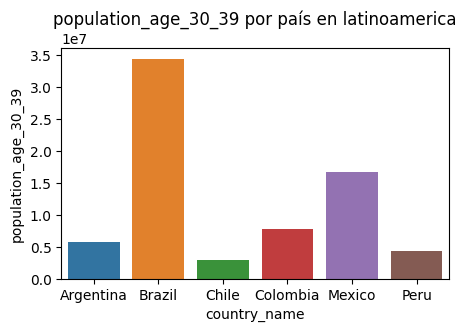

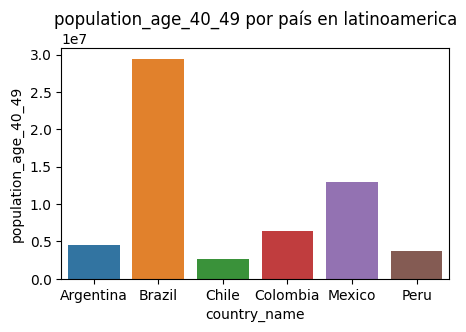

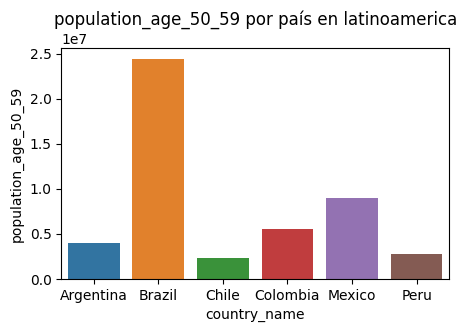

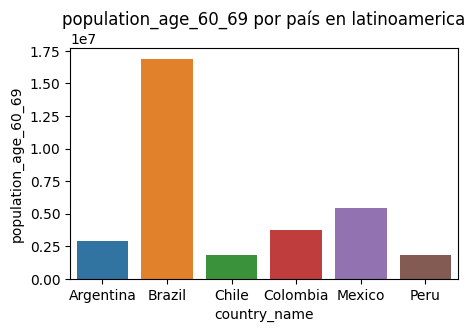

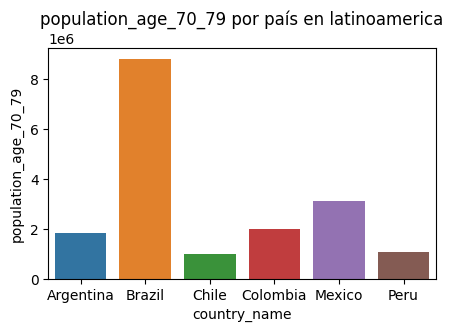

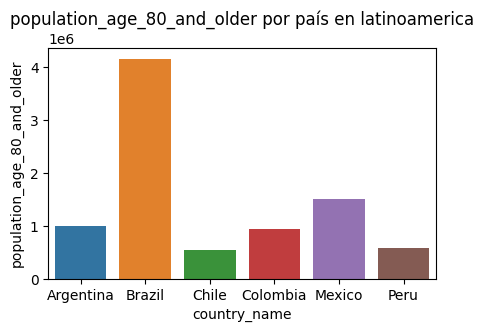

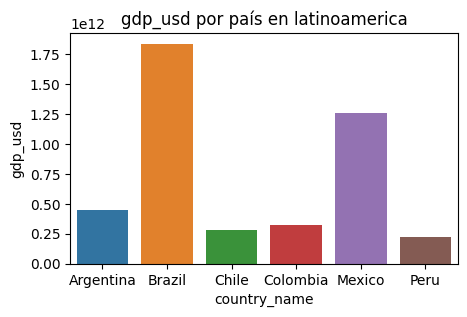

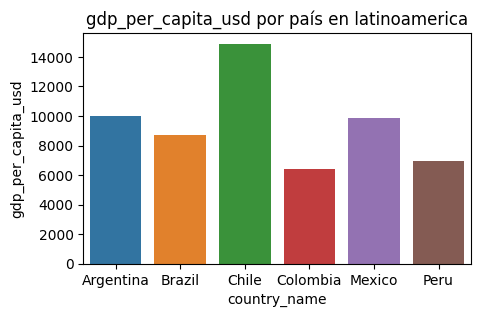

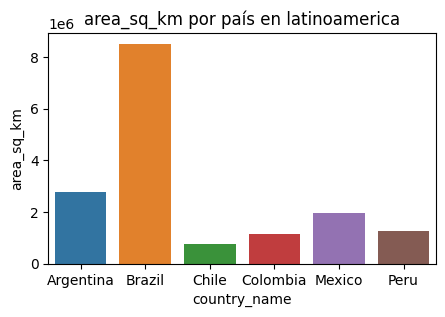

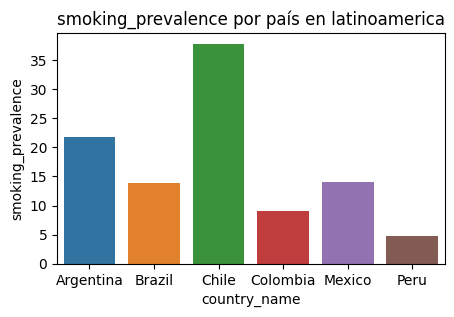

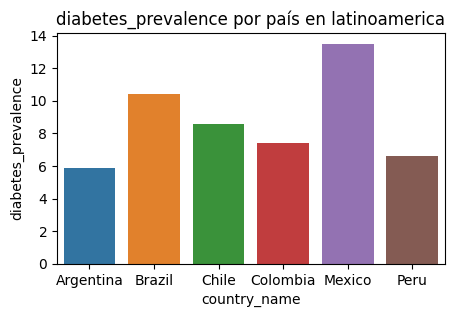

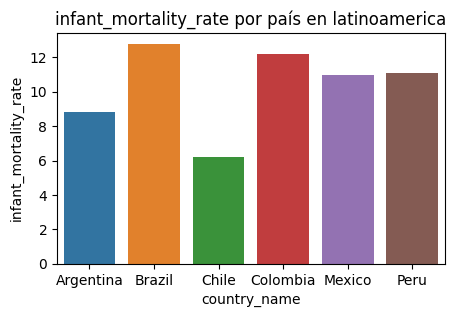

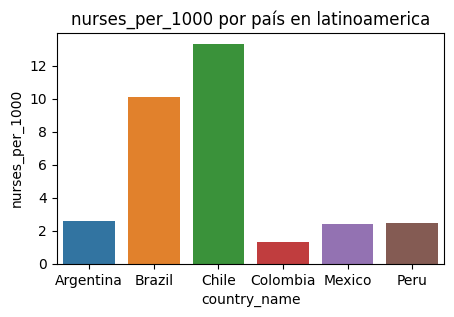

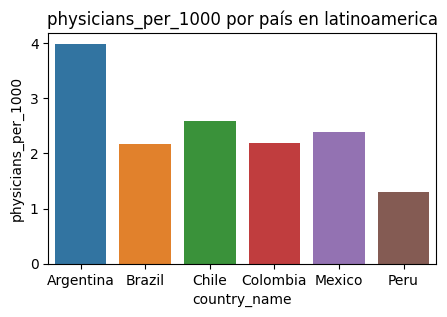

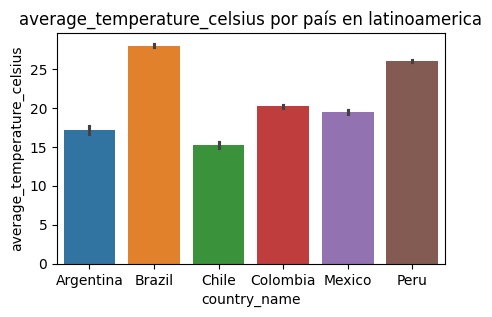

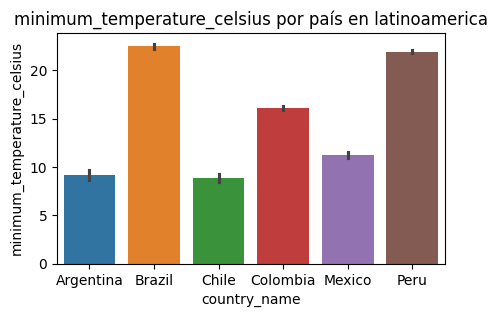

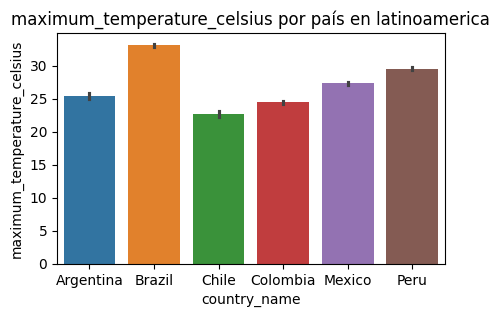

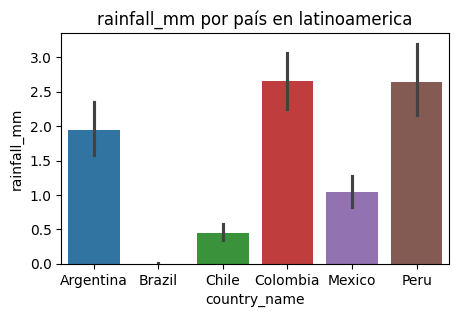

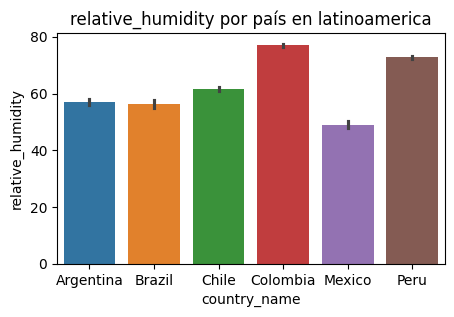

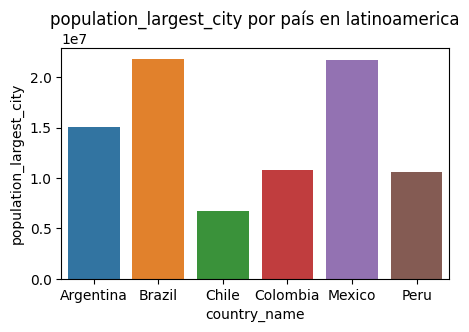

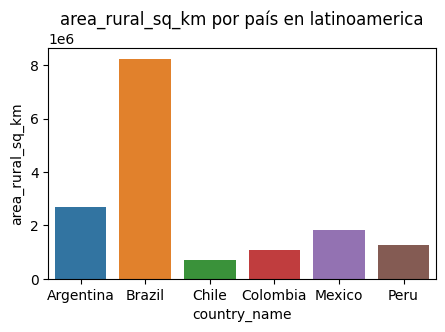

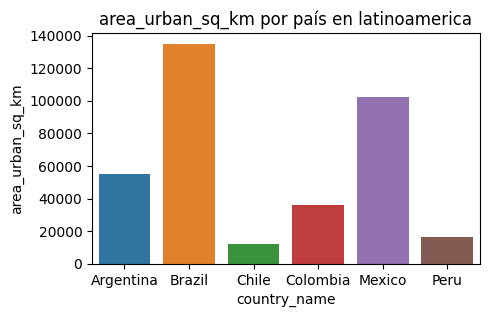

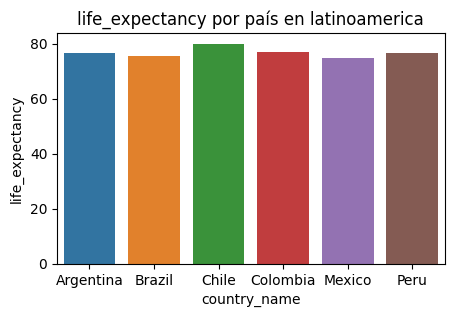

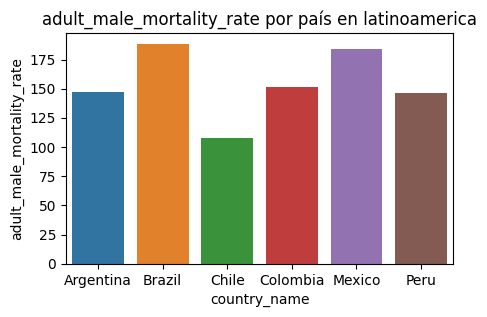

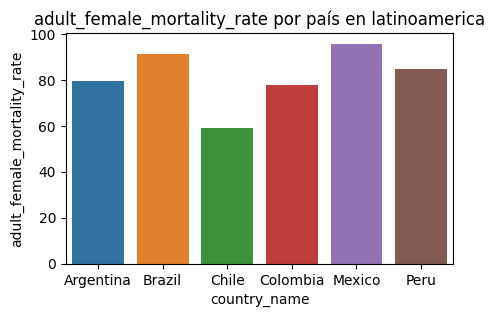

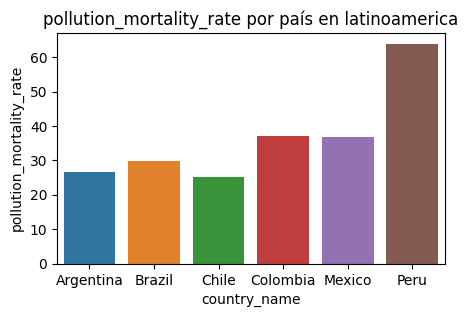

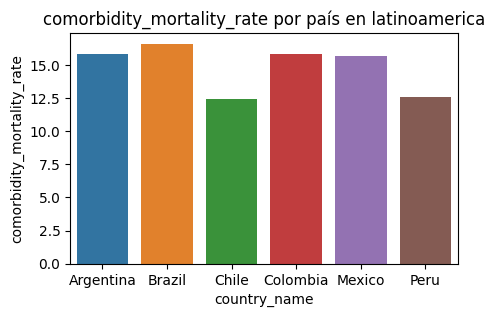

In [27]:
sin_cambio= ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']
for i in df_filtrado_final.columns:
    if i not in sin_cambio:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=df_filtrado_final, ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

In [28]:
variables_cambios=numerico.columns[numerico.nunique() > 1]
variables_cambios

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'population', 'population_male', 'population_female',
       'population_rural', 'population_urban', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older', 'gdp_usd',
       'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy',
       'adult_ma

In [29]:
df_filtrado_final.nunique()

location_key                                6
country_code                                6
country_name                                6
new_confirmed                            3191
new_deceased                              926
cumulative_confirmed                     3522
cumulative_deceased                      3509
cumulative_vaccine_doses_administered    3154
population                                  6
population_male                             6
population_female                           6
population_rural                            6
population_urban                            6
population_density                          6
human_development_index                     6
population_age_00_09                        6
population_age_10_19                        6
population_age_20_29                        6
population_age_30_39                        6
population_age_40_49                        6
population_age_50_59                        6
population_age_60_69              

In [30]:
df_filtrado_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null  

In [31]:
df_filtrado_final.resample('W').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2021-01-03    7467.000000    339.416667          2.384300e+06   
2021-01-10   17449.880952    491.404762          2.459657e+06   
2021-01-17   17716.023810    537.595238          2.582440e+06   
2021-01-24   16453.500000    597.476190          2.702934e+06   
2021-01-31   15402.714286    593.928571          2.814130e+06   
...                   ...           ...                   ...   
2022-08-21    6708.690476     51.500000          1.026049e+07   
2022-08-28    5321.071429     43.357143          1.030254e+07   
2022-09-04    3958.309524     38.523810          1.033486e+07   
2022-09-11    2800.119048     26.380952          1.035769e+07   
2022-09-18    8026.028843    145.429588          8.656710e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2021-01-03         92785.833333                           6.884746e+07   
2021-01-10         94898.380952                           5.114185e+07   
2021-01-17         98516.380952                           4.598947e+07   
2021-01-24        102539.833333                           1.490867e+07   
2021-01-31        106753.714286                           1.432359e+07   
...                         ...                                    ...   
2022-08-21        208643.952381                           1.238067e+08   
2022-08-28        208974.761905                           1.228391e+08   
2022-09-04        209257.523810                           1.230353e+08   
2022-09-11        209471.880952                           1.200930e+08   
2022-09-18        202648.426910                           9.581776e+07   

              population  population_male  population_female  \
date                                                           
2021-01-03  7.772147e+07       37870352.5         39271616.5   
2021-01-10  7.772147e+07       37870352.5         39271616.5   
2021-01-17  7.772147e+07       37870352.5         39271616.5   
2021-01-24  7.772147e+07       37870352.5         39271616.5   
2021-01-31  7.772147e+07       37870352.5         39271616.5   
...                  ...              ...                ...   
2022-08-21  7.772147e+07       37870352.5         39271616.5   
2022-08-28  7.772147e+07       37870352.5         39271616.5   
2022-09-04  7.772147e+07       37870352.5         39271616.5   
2022-09-11  7.772147e+07       37870352.5         39271616.5   
2022-09-18  7.772147e+07       37870352.5         39271616.5   

            population_rural  population_urban  ...  population_largest_city  \
date                                            ...                            
2021-01-03      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-10      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-17      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-24      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-31      1.255498e+07      6.833931e+07  ...               14438882.0   
...                      ...               ...  ...                      ...   
2022-08-21      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-08-28      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-04      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-11      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-18      1.255498e+07      6.833931e+07  ...               14438882.0   

            area_rural_sq_km  area_urban_sq_km  life_expectancy  \
date                                                              
2021-01-03         2636579.5           59502.5          76.8085   
2021-01-10         2636579.5           59502.5          76.8085   
2021-01-17         2636579.5           59502.5          76.80

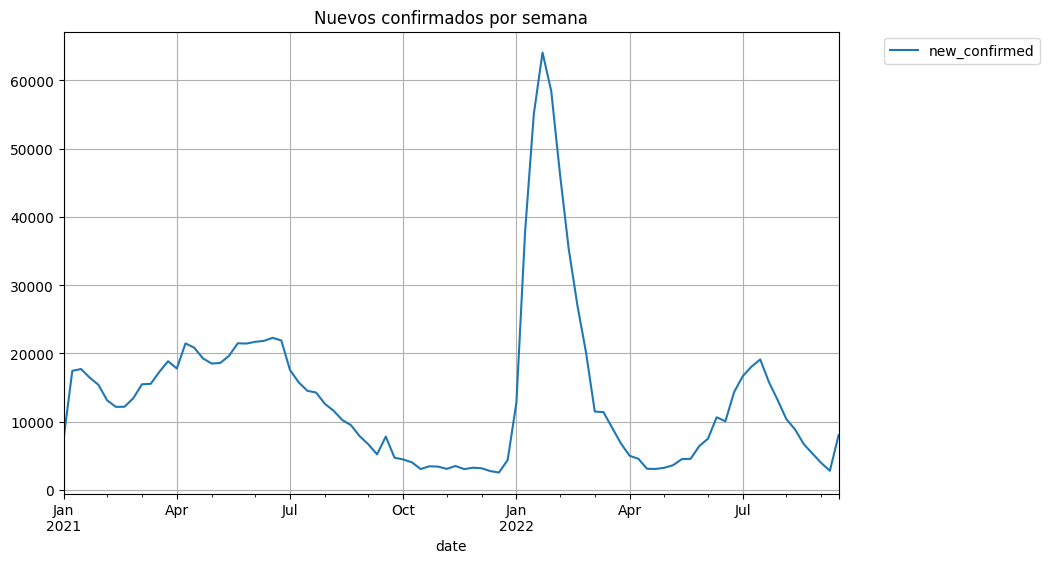

In [32]:
#Calculo de casos confirmados por semana
fig, ax = plt.subplots(figsize=(10, 6))
df_filtrado_final.resample('W').mean(numeric_only=True)['new_confirmed'].plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Nuevos confirmados por semana')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

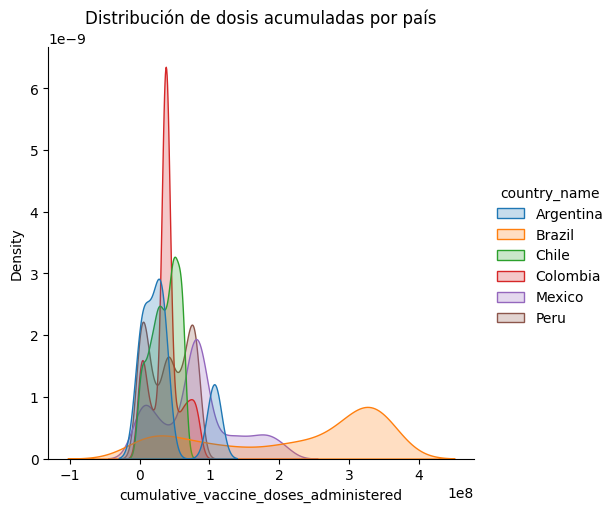

In [33]:
sns.displot(df_filtrado_final, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

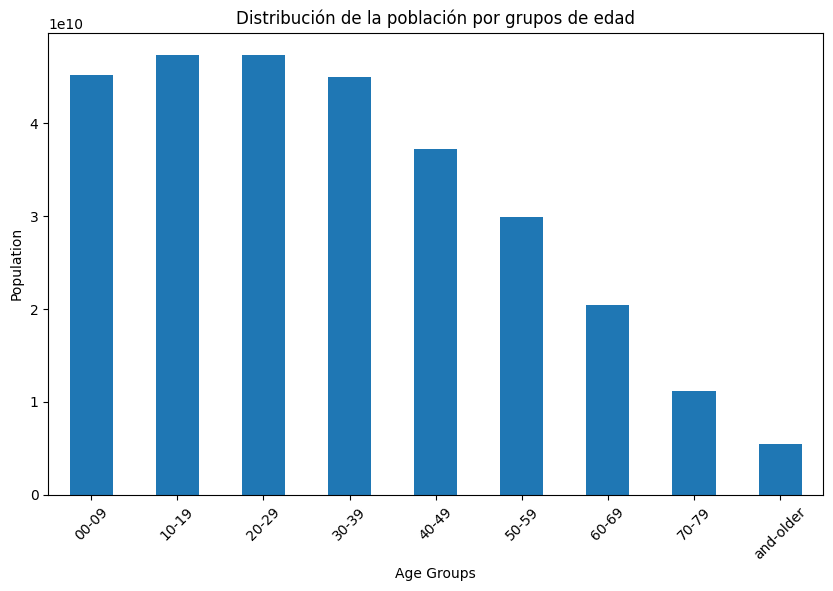

In [34]:
# Calculamos la distribucion de la poblacion por grupos de edad

age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = df_filtrado_final[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

## Avance 3

country_name
Argentina    0.017389
Chile        0.017774
Brazil       0.024225
Colombia     0.026112
Mexico       0.062101
Peru         0.073326
Name: case_fatality_rate, dtype: float64


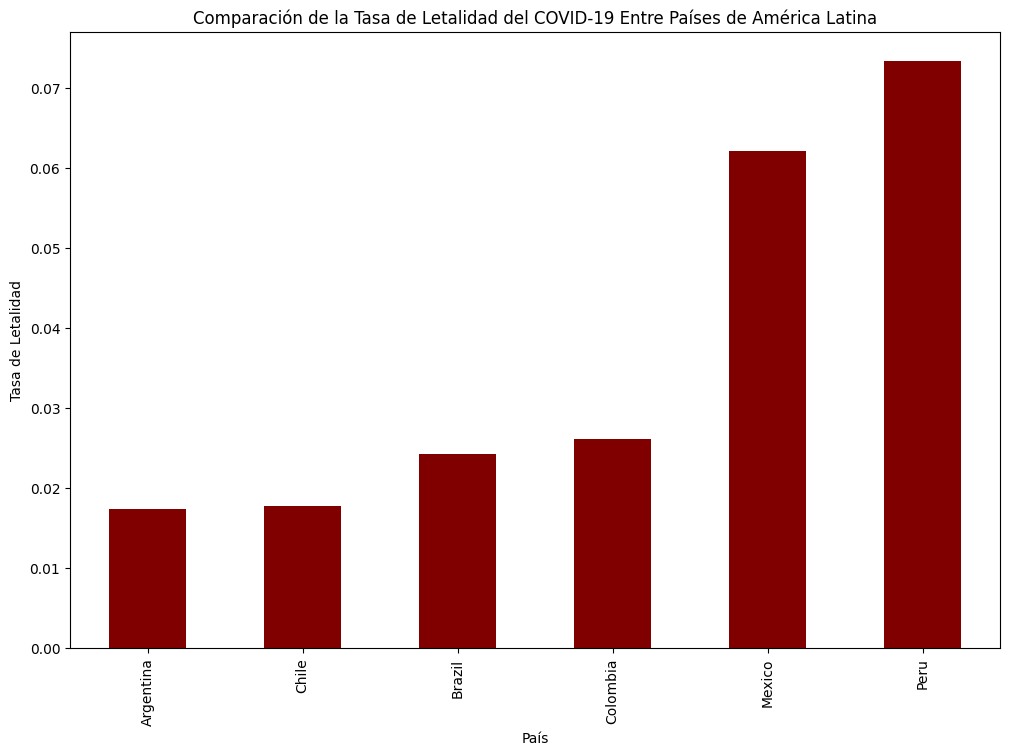

In [60]:
#  Se calcula la tasa de fatalidad por país dividiendo el numero de muertes acumuladas sobre los casos confirmados acumulados

df_filtrado_final['case_fatality_rate'] = df_filtrado_final['cumulative_deceased'] / df_filtrado_final['cumulative_confirmed']
fatality_rates = df_filtrado_final.groupby('country_name')['case_fatality_rate'].last().sort_values()
print(fatality_rates)
plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

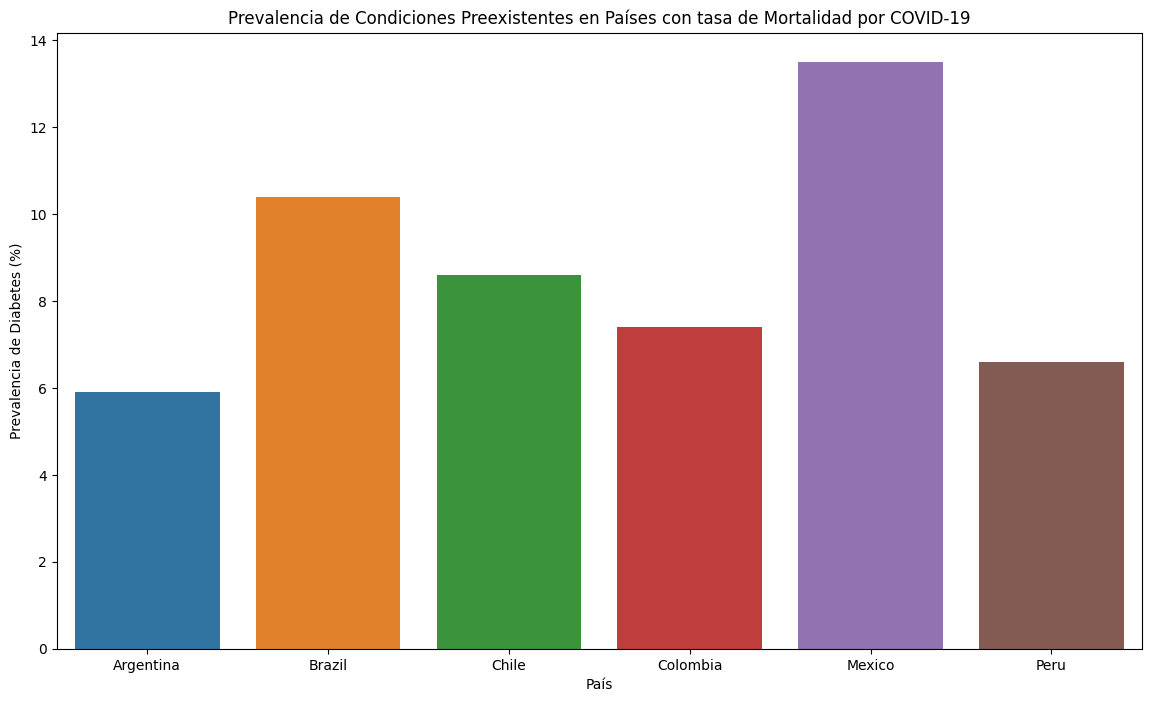

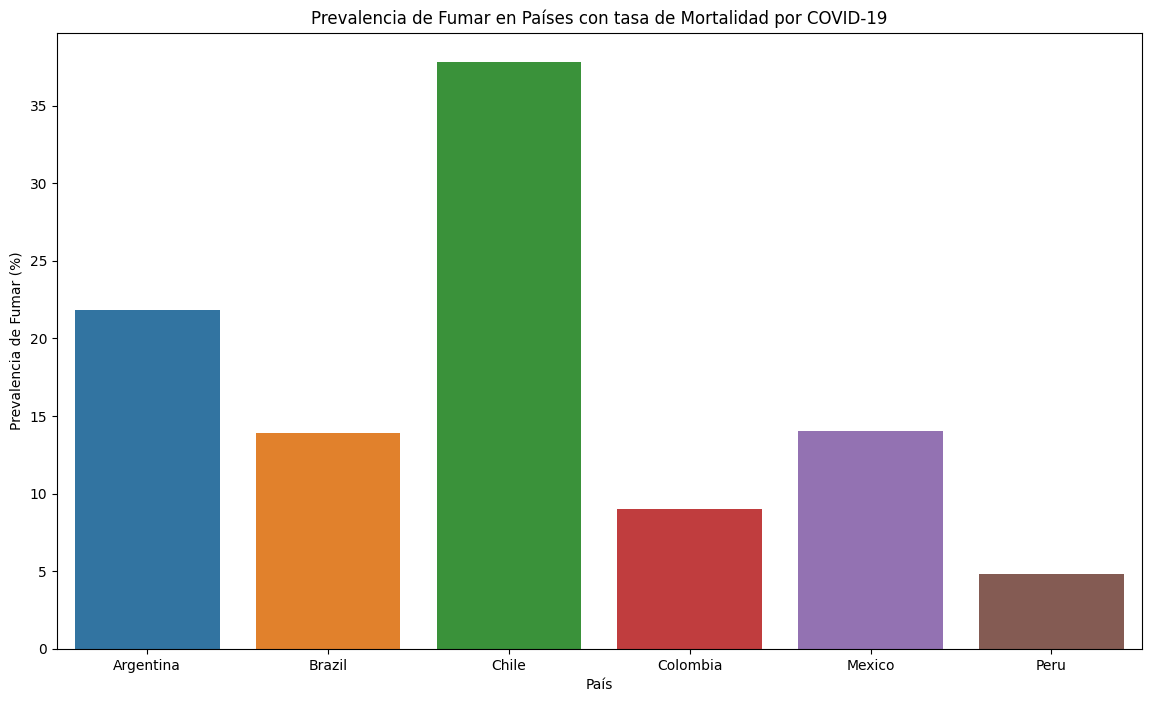

In [36]:
# Es establece una posible relación entre prevalencia de diabetes o fumar y la tasa de mortalidad por cada país.

plt.figure(figsize=(14, 8))
sns.barplot(data=df_filtrado_final, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con tasa de Mortalidad por COVID-19')
plt.show()

# Prevalencia de fumar.
plt.figure(figsize=(14, 8))
sns.barplot(data=df_filtrado_final, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con tasa de Mortalidad por COVID-19')
plt.show()

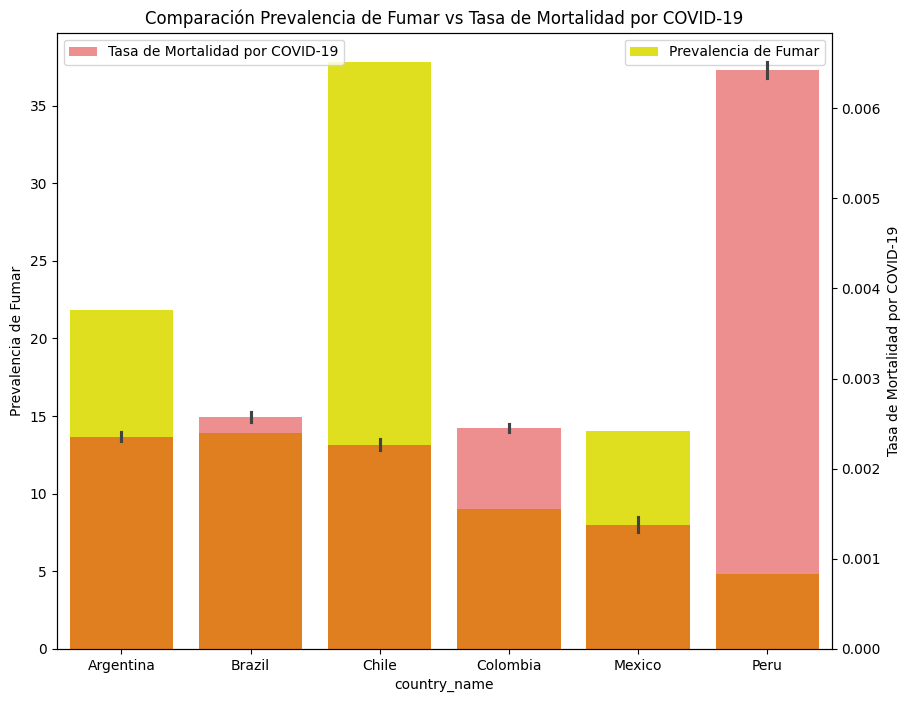

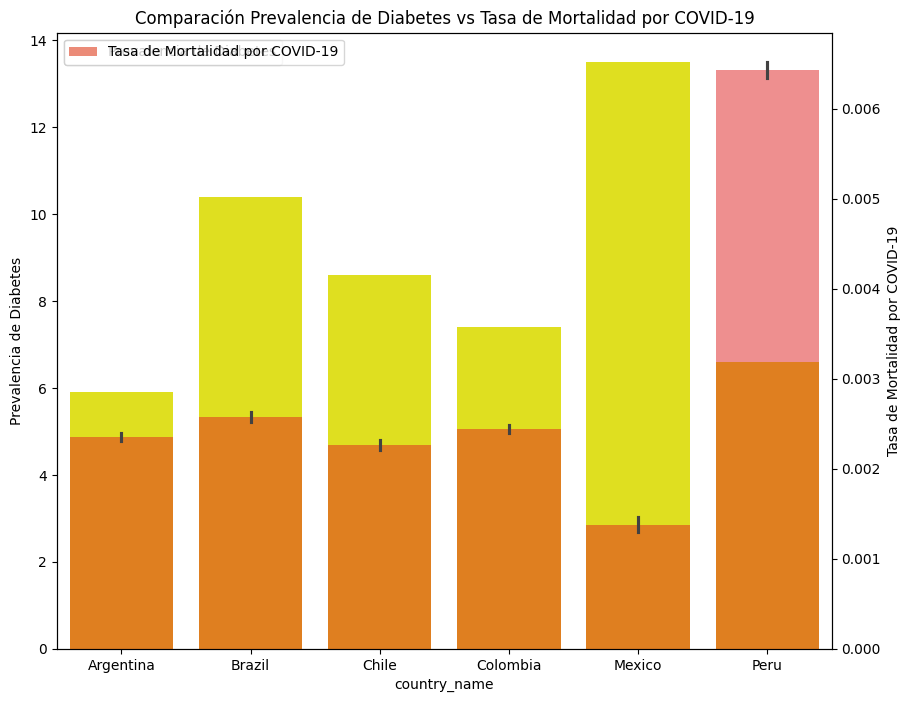

In [40]:
#Se añade a la gráfica anterior la tasa de mortalidad para evidenciar una posible relación
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data=df_filtrado_final, x= df_filtrado_final['country_name'], y= df_filtrado_final['smoking_prevalence'], color='yellow', label='Prevalencia de Fumar')
ax2 = ax.twinx()
sns.barplot(data=df_filtrado_final, x= df_filtrado_final['country_name'], y= df_filtrado_final['cumulative_deceased'] / df_filtrado_final['population'], color='red', label='Tasa de Mortalidad por COVID-19', ax=ax2, 
            alpha=0.5)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación Prevalencia de Fumar vs Tasa de Mortalidad por COVID-19')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data=df_filtrado_final, x= df_filtrado_final['country_name'], y= df_filtrado_final['diabetes_prevalence'], color='yellow', label='Prevalencia de Diabetes')
ax2 = ax.twinx()
sns.barplot(data=df_filtrado_final, x= df_filtrado_final['country_name'], y= df_filtrado_final['cumulative_deceased'] / df_filtrado_final['population'], color='red', label='Tasa de Mortalidad por COVID-19', ax=ax2, 
            alpha=0.5)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación Prevalencia de Diabetes vs Tasa de Mortalidad por COVID-19')
plt.show()

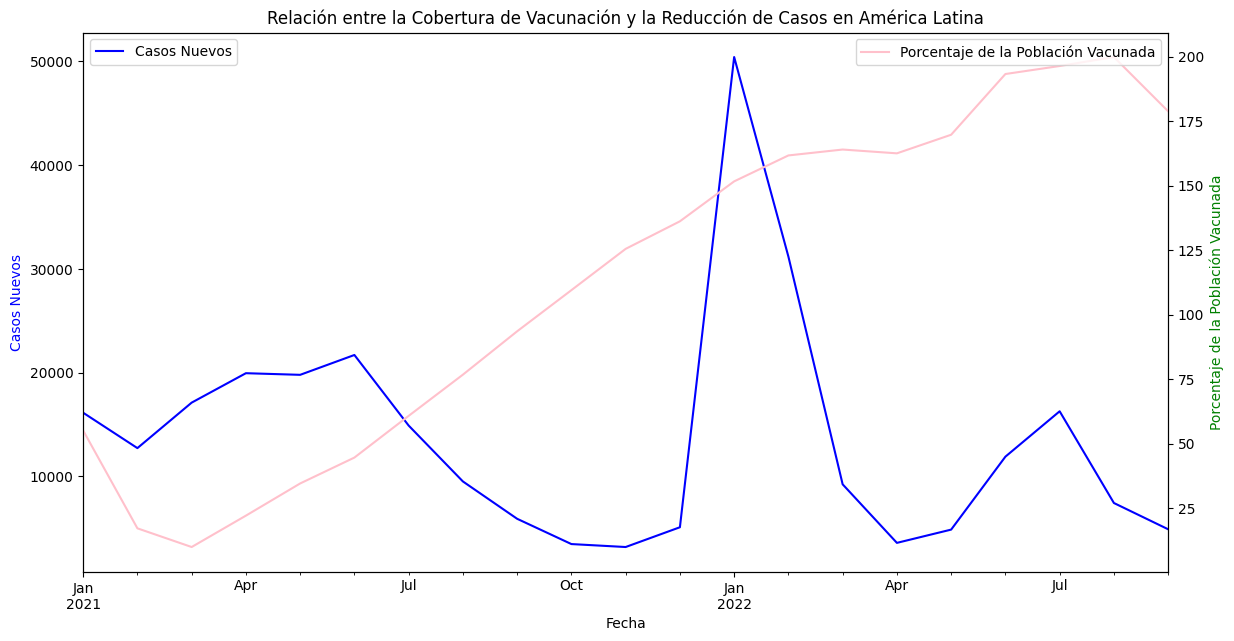

In [42]:
# Además, ver como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
df_filtrado_final['percentage_vaccinated'] = df_filtrado_final['cumulative_vaccine_doses_administered'] / df_filtrado_final['population'] * 100
df_filtrado_final.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
df_filtrado_final.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='pink', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

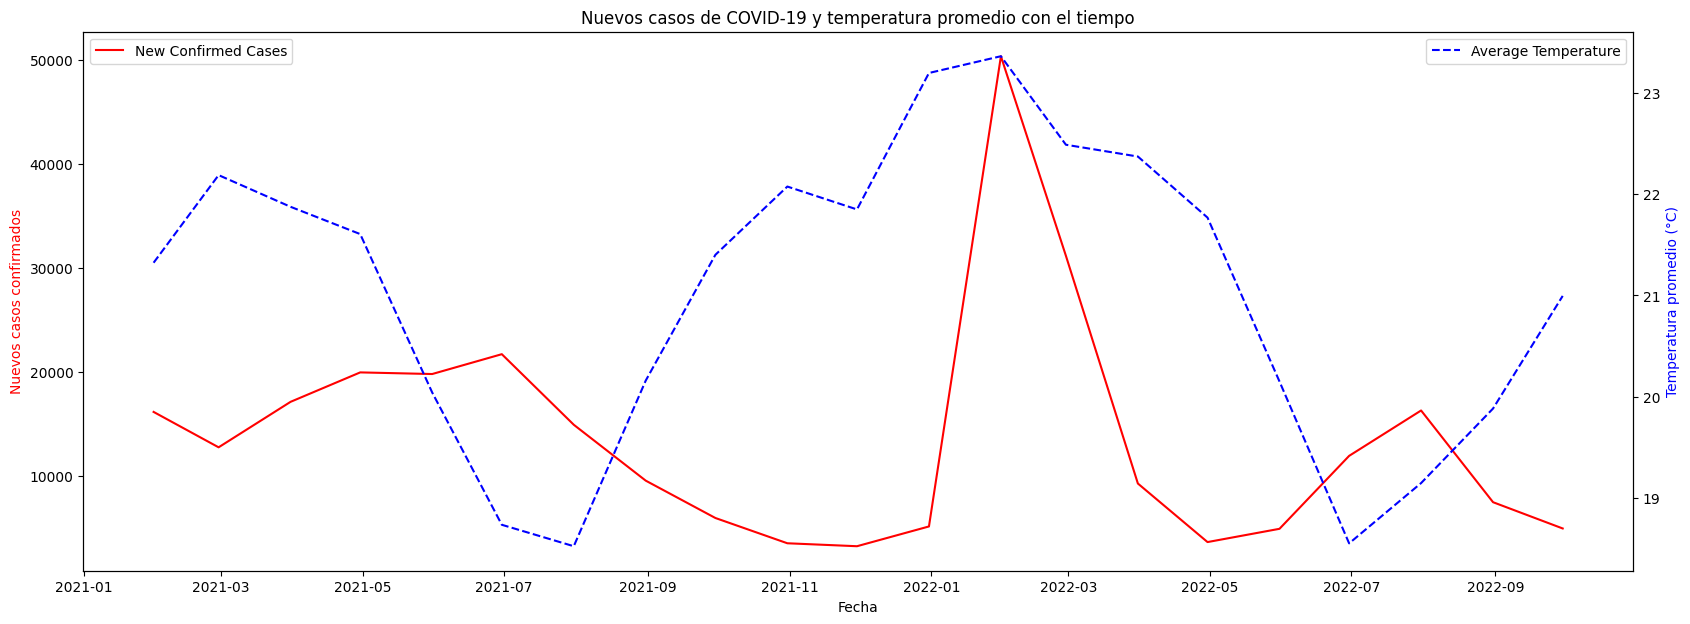

In [43]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_filtrado_final.resample('ME').mean(numeric_only=True).index, df_filtrado_final.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(df_filtrado_final.resample('ME').mean(numeric_only=True).index, df_filtrado_final.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

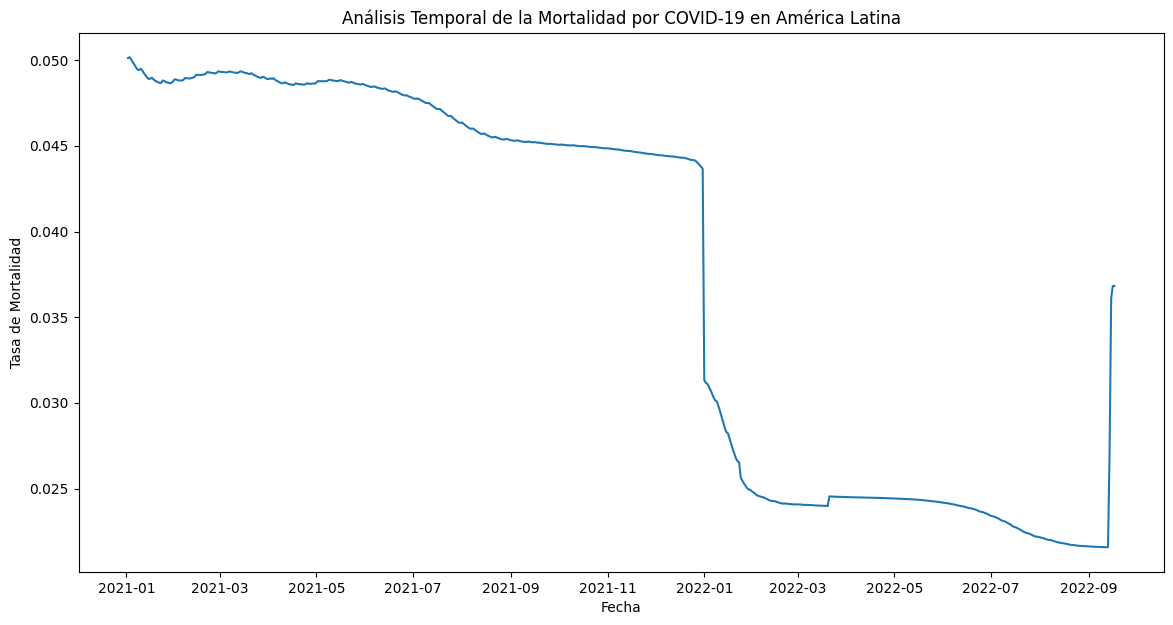

In [39]:
# cómo evolucionó la mortalidad

df_filtrado_final['mortality_rate'] = df_filtrado_final['cumulative_deceased'] / df_filtrado_final['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado_final, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

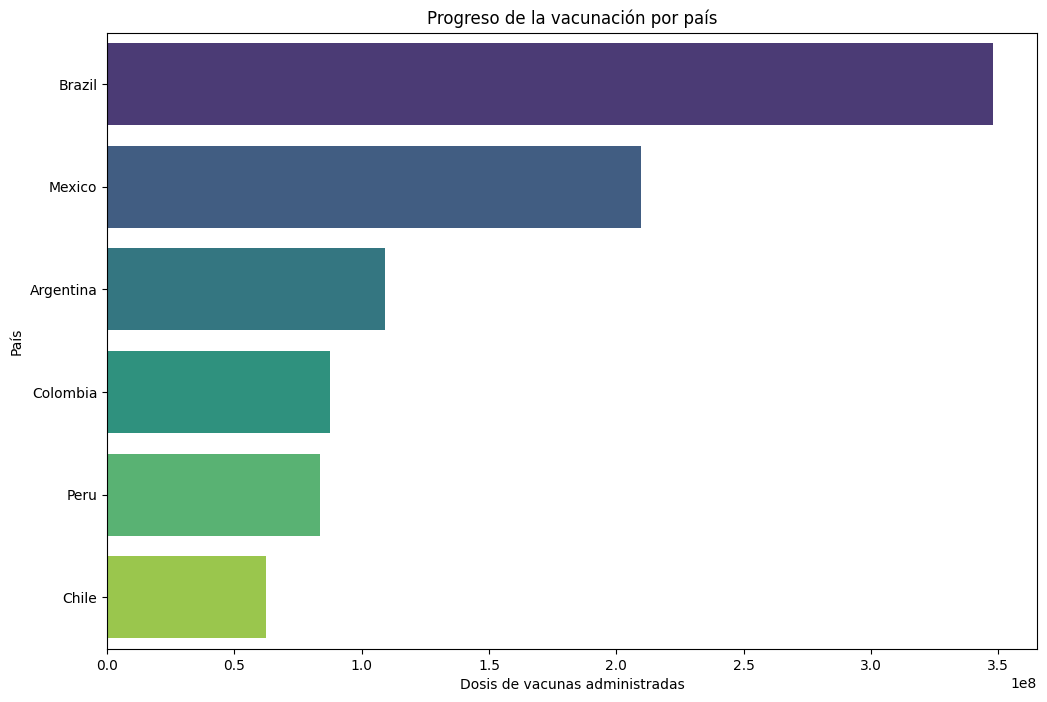

In [41]:
vaccination_data = df_filtrado_final.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index,hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

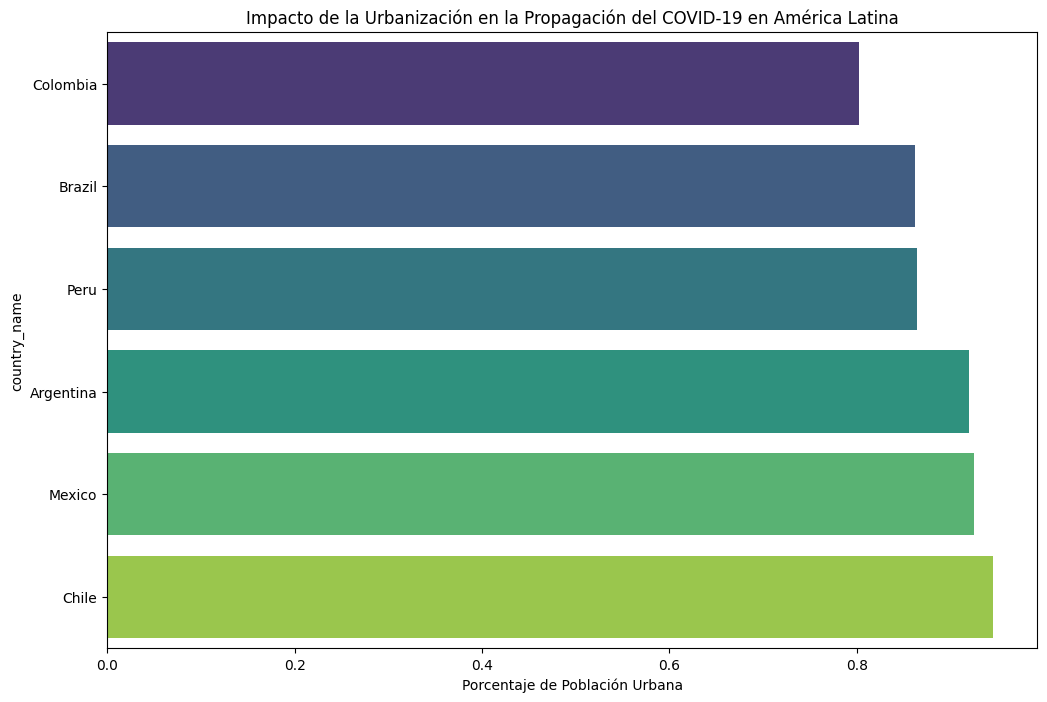

In [48]:
df_filtrado_final['urban_population_percentage'] = df_filtrado_final['population_urban'] / df_filtrado_final['population']
urban_cases = df_filtrado_final.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis', hue=urban_cases.index, legend=False)
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')
plt.show()

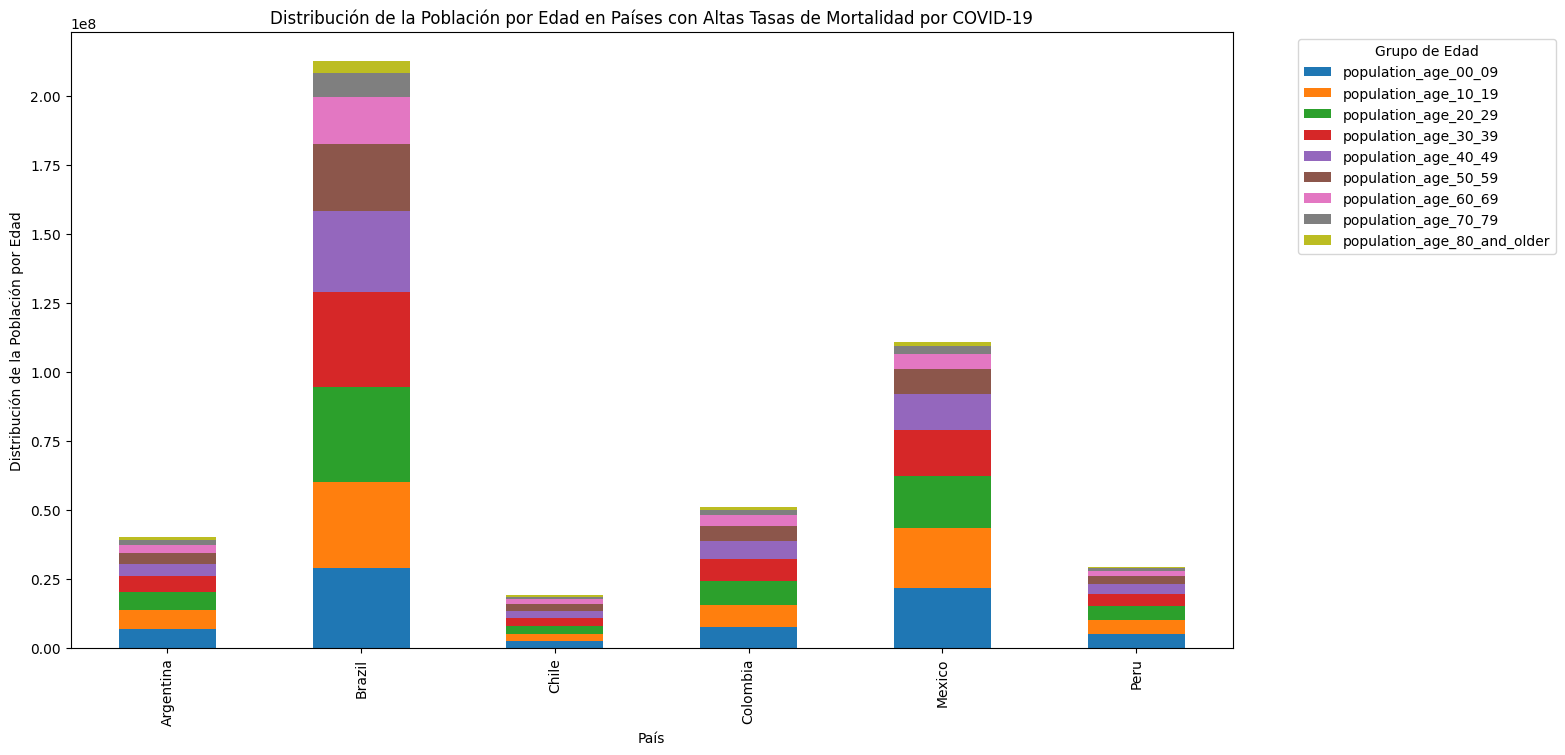

In [57]:
high_mortality_countries = df_filtrado_final.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = df_filtrado_final[df_filtrado_final['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Grupo de Edad')
plt.show()